# Start

In [1]:
from os.path import join
import numpy as np
import pandas as pd
from make_dataset import make_dataset
from sklearn.metrics import mean_absolute_error
import torch
import torch.nn as nn
import torch.optim as optim

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
len(test_x)

699

In [2]:
#path = '\\Users\\ineeji\\Desktop\\새 폴더\\Ineeji\\datas\\데이터합본_파생변수 제거.csv'
#path = '\\Users\\jeonjuhyeog\\Documents\\past\\datas\\데이터합본_파생변수 제거.csv'
path = '\\Users\\ineeji\\Desktop\\past\\datas\\데이터합본_파생변수 제거.csv'
train_x, train_y, test_x, test_y = make_dataset(path)
#train_x = train_x.filter(regex='SS')
#test_x = test_x.filter(regex='SS')
print(len(train_x))
print(len(test_x))
#train_x.drop(['Unnamed: 0'],axis=1,inplace=True)
#test_x.drop(['Unnamed: 0'],axis=1,inplace=True)
#train_x = train_x['FIC23105(P/A RT Flow)']
#test_x = test_x['FIC23105(P/A RT Flow)']
#train_x = pd.DataFrame(train_x)
#test_x = pd.DataFrame(test_x)
train_x

920
           Unnamed: 0                  DSL D-95         FIC21185(F1 Flow)  \
1449  2019-01-01 7:00  399.19999999999998863132  646.13030000000003383320   
1450  2019-01-02 7:00  396.00000000000000000000  647.10440000000005511538   
1451  2019-01-03 7:00  396.19999999999998863132  646.89419999999995525286   
1452  2019-01-04 7:00  399.80000000000001136868  647.45090000000004692993   
1453  2019-01-05 7:00  401.00000000000000000000  647.31470000000001618901   
...               ...                       ...                       ...   
2364  2021-07-08 7:00  368.60000000000002273737  538.22289999999998144631   
2365  2021-07-09 7:00  369.39999999999997726263  536.85419999999999163265   
2366  2021-07-10 7:00  368.80000000000001136868  562.31640000000004420144   
2367  2021-07-11 7:00  366.39999999999997726263  561.63559999999995397957   
2368  2021-07-12 7:00  364.00000000000000000000  558.42870000000004893081   

             FIC21192(F2 Flow)         TIC23115(Feed1 T)  \
1449   44.8

,TI23123(Reflux T),FI23107(OF Flow),FIC23104(Reflux F),FI23116(T-AR Flow 1),FI23117(T-AR Flow 2),PCA_1
0,42.48020000000000351292,21.24530000000000029559,92.09180000000000632099,153.68760000000000331966,309.69909999999998717612,-32.21527958837112493029
1,43.30870000000000175078,20.90020000000000166551,87.64549999999999840838,142.48369999999999890861,311.74829999999997198756,-39.26745461928467761936
2,43.03150000000000119371,23.31129999999999924398,92.23000000000000397904,129.77770000000001004992,331.61770000000001346052,-34.32998843321516346805
3,43.96770000000000067075,26.91159999999999996589,92.35590000000000543423,99.16549999999999442934,358.95229999999997971827,-32.12821662102055597643
4,44.36889999999999645297,27.44750000000000156319,91.59369999999999834017,77.52630000000000620730,382.53910000000001900844,-33.73238956270466815113
...,...,...,...,...,...,...
1444,41.53309999999999746478,0.00000000000000000000,87.45569999999999311058,183.63390000000001123226,300.23419999999998708518,-22.66641667075507626805
1445,39.66210000000000235332,0.00000000000000000000,81.89499999999999602096,177.01769999999999072315,307.81599999999997407940,-23.39559356514518384529
1446,40.61869999999999691909,0.00000000000000000000,81.79869999999999663487,167.80330000000000723048,318.55299999999999727152,-20.91561976702985248266
1447,40.80570000000000163709,0.00000000000000000000,83.35030000000000427463,174.65389999999999304237,308.73450000000002546585,-23.49447043792346434543


In [3]:
train_x.drop(['date','hour'],axis=1,inplace=True)
test_x.drop(['date','hour'],axis=1,inplace=True)

In [3]:
train_x.drop(['year','month','date','hour'],axis=1,inplace=True)
test_x.drop(['year','month','date','hour'],axis=1,inplace=True)

In [4]:
train_x.drop(['Unnamed: 0'],axis=1,inplace=True)
test_x.drop(['Unnamed: 0'],axis=1,inplace=True)

<AxesSubplot:>

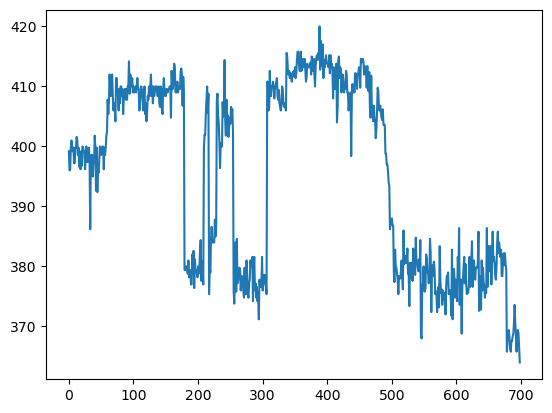

In [5]:
test_y.plot()

<AxesSubplot:>

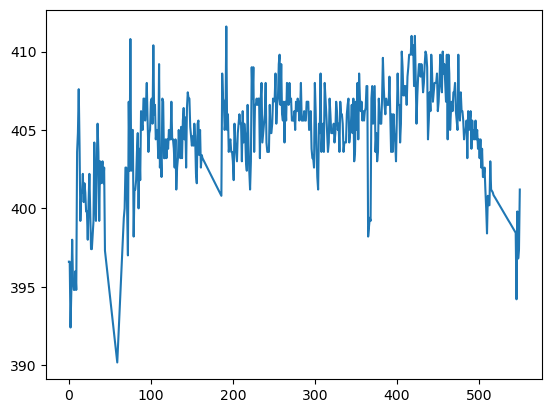

In [6]:
train = pd.concat([train_x,train_y],axis=1)
train = train[train['DSL D-95'] > 390]
train['DSL D-95'].plot()

In [7]:
train_x.drop(['Unnamed: 0'],axis=1,inplace=True)
test_x.drop(['Unnamed: 0'],axis=1,inplace=True)

In [157]:
test_x = test_x[['TI23118(D/O Liquid T)','TI23120(F Zone T)']]
test_x

,TI23118(D/O Liquid T),TI23120(F Zone T)
0,229.75280000000000768523,359.99919999999997344275
1,230.18739999999999668034,360.18459999999998899511
2,231.23730000000000472937,361.24000000000000909495
3,232.17549999999999954525,361.30470000000002528395
4,232.83289999999999508873,361.84649999999999181455
...,...,...
915,230.39140000000000441105,365.76819999999997889972
916,231.64289999999999736247,365.85899999999998044586
917,231.76609999999999445208,365.05309999999997216946
918,231.46920000000000072760,364.35090000000002419256


In [103]:
test = pd.concat([test_x,test_y],axis=1)
dl = test.corr()['DSL D-95'].sort_values(ascending = False)[:]
dl

C:\Users\ineeji\AppData\Local\Temp\ipykernel_25508\3979278771.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dl = test.corr()['DSL D-95'].sort_values(ascending = False)[:]


DSL D-95                  1.00000000000000000000
TI23502(D/O Vapor T)      0.77343871844835976326
FIC23108(SS Flow)         0.72412806697121689936
FIC23133(R/D Flow)        0.72261672967099865872
TI23118(D/O Liquid T)     0.71788750353504149349
FIC23010(D/O Flow)        0.69475680845628884352
TI23119(OV T)             0.68931824174413136586
TI23120(F Zone T)         0.67959712366056557187
TI23029(Feed2 T)          0.65317306579120137933
TIC23115(Feed1 T)         0.64621053318274657151
TI23117(DSL S Vapor T)    0.64322135406882696707
TI23122(BTM T)            0.64257859639819536746
TI23028(P/A RT T)         0.62392196695605495194
FIC21192(F2 Flow)         0.61739618130612738955
TI21022A(Catalyst T 1)    0.61499752478621527718
TI21022B(Catalyst T 2)    0.61447523157750971734
TI23121(SS T)             0.58713392660640228993
FI23117(T-AR Flow 2)      0.57532873263883232973
FIC23105(P/A RT Flow)     0.55031938476084729661
TI23116(Top T)            0.53088804895015850871
FIC21185(F1 Flow)   

In [13]:
test = pd.concat([test_x,test_y],axis=1)
dl = test.corr()['DSL D-95'].sort_values(ascending = False)[:7]
print(dl)
dl = pd.DataFrame(dl)
dl = dl.reset_index()
dl = dl['index']
test = test[dl]
test_x = test.drop(['DSL D-95'],axis=1)
test_y = test['DSL D-95']
print(test_x.columns)

DSL D-95                 1.00000000000000000000
TI23502(D/O Vapor T)     0.77343871844835976326
FIC23108(SS Flow)        0.72412806697121689936
FIC23133(R/D Flow)       0.72261672967099865872
TI23118(D/O Liquid T)    0.71788750353504149349
FIC23010(D/O Flow)       0.69475680845628884352
TI23119(OV T)            0.68931824174413136586
Name: DSL D-95, dtype: float64
Index(['TI23502(D/O Vapor T)', 'FIC23108(SS Flow)', 'FIC23133(R/D Flow)',
       'TI23118(D/O Liquid T)', 'FIC23010(D/O Flow)', 'TI23119(OV T)'],
      dtype='object')


In [110]:
test_x = test_x[['TI23120(F Zone T)', 'TI23502(D/O Vapor T)', 'TI23118(D/O Liquid T)']]
test_x

,TI23120(F Zone T),TI23502(D/O Vapor T),TI23118(D/O Liquid T)
0,359.99919999999997344275,296.87340000000000372893,229.75280000000000768523
1,360.18459999999998899511,295.07699999999999818101,230.18739999999999668034
2,361.24000000000000909495,298.90499999999997271516,231.23730000000000472937
3,361.30470000000002528395,303.09809999999998808562,232.17549999999999954525
4,361.84649999999999181455,307.21890000000001919034,232.83289999999999508873
...,...,...,...
915,365.76819999999997889972,292.11770000000001346052,230.39140000000000441105
916,365.85899999999998044586,293.32100000000002637535,231.64289999999999736247
917,365.05309999999997216946,291.40870000000001027729,231.76609999999999445208
918,364.35090000000002419256,290.09230000000002291927,231.46920000000000072760


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [110]:
test_x = test_x.iloc[:,:-4]

In [111]:
test_x

,FIC21185(F1 Flow),FIC21192(F2 Flow),TIC23115(Feed1 T),TI23029(Feed2 T),FIC23108(SS Flow),PI23105(F Zone P),TI23120(F Zone T),TI23121(SS T),PI23038(BTM P),TI23123(Reflux T),...,FI23116(T-AR Flow 1),FI23117(T-AR Flow 2),FIC25103(OVHD Flow 1),FIC23110(OVHD Flow 2),TI23118(D/O Liquid T),FIC23133(R/D Flow),FIC23105(P/A RT Flow),TI23028(P/A RT T),TI21022A(Catalyst T 1),TI21022B(Catalyst T 2)
0,646.13030000000003383320,44.83420000000000271712,366.20560000000000400178,326.19740000000001600711,12.99820000000000064233,0.82159999999999999698,359.99919999999997344275,300.12200000000001409717,0.90090000000000003411,40.58979999999999677129,...,181.88419999999999276952,304.46559999999999490683,1.77000000000000001776,11.30470000000000041496,229.75280000000000768523,82.84860000000000468390,299.97509999999999763531,189.80559999999999831743,369.60109999999997398845,369.45510000000001582521
1,647.10440000000005511538,45.68860000000000098908,366.99950000000001182343,326.31279999999998153726,13.00099999999999944578,0.82389999999999996572,360.18459999999998899511,299.69720000000000936780,0.90329999999999999183,41.07770000000000010232,...,184.87100000000000932232,301.97079999999999699867,1.78869999999999995666,10.61720000000000041496,230.18739999999999668034,83.80119999999999436113,299.99279999999998835847,189.82069999999998799467,370.05849999999998090061,369.75929999999999608917
2,646.89419999999995525286,45.90910000000000223963,366.99220000000002528395,326.38150000000001682565,13.00200000000000066791,0.82279999999999997584,361.24000000000000909495,300.77150000000000318323,0.90239999999999997993,40.93070000000000163709,...,180.68860000000000809450,302.91669999999999163265,1.80059999999999997833,10.75699999999999967315,231.23730000000000472937,85.84600000000000363798,299.97000000000002728484,189.52690000000001191438,370.16480000000001382432,370.01879999999999881766
3,647.45090000000004692993,45.56799999999999783995,366.97899999999998499334,326.50769999999999981810,13.00070000000000014495,0.82010000000000005116,361.30470000000002528395,300.69779999999997244231,0.90029999999999998916,41.44200000000000017053,...,187.20099999999999340616,296.91039999999998144631,1.80220000000000002416,11.01740000000000030411,232.17549999999999954525,86.33150000000000545697,299.96609999999998308340,189.52770000000001004992,370.01010000000002264642,369.87920000000002573870
4,647.31470000000001618901,45.72930000000000205773,366.98289999999997235136,326.44709999999997762643,13.00150000000000005684,0.81940000000000001723,361.84649999999999181455,299.68189999999998462954,0.89990000000000003322,41.40319999999999822649,...,182.64680000000001314220,300.44200000000000727596,1.86139999999999994351,11.26019999999999932072,232.83289999999999508873,86.74020000000000152340,295.62619999999998299245,189.83000000000001250555,370.60460000000000491127,370.41759999999999308784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,538.22289999999998144631,92.51380000000000336513,382.51330000000001518856,306.84789999999998144631,11.00360000000000049170,0.92869999999999996998,365.76819999999997889972,291.08519999999998617568,0.90149999999999996803,46.55499999999999971578,...,130.91599999999999681677,307.95370000000002619345,3.10959999999999991971,20.00090000000000145519,230.39140000000000441105,131.21780000000001109584,469.80360000000001718945,172.00409999999999399733,391.66599999999999681677,391.69299999999998362910
916,536.85419999999999163265,92.52840000000000486580,382.50139999999998963176,307.31909999999999172360,11.00569999999999915019,0.91700000000000003730,365.85899999999998044586,291.20150000000001000444,0.89470000000000005080,46.32289999999999707825,...,130.55219999999999913598,303.63200000000000500222,3.19919999999999982165,20.82100000000000150635,231.64289999999999736247,130.44149999999999067768,470.28789999999997917257,171.84149999999999636202,391.77910000000002810339,391.78149999999999408828
917,562.31640000000004420144,95.8796999999999997044

In [113]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


def calculate_vif(X):
    """
    Calculate the Variance Inflation Factor (VIF) for each variable in X.
    """
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [sm.OLS(X[col], X.drop(col, axis=1)).fit().rsquared for col in X.columns]
    return vif

vif = calculate_vif(test_x)
print(vif['VIF'].sort_values())


11    0.74659644009660341979
19    0.97752019604034523503
21    0.98777699302820465288
17    0.98798381920845623760
22    0.98979666251919862230
20    0.99215963515612004553
25    0.99328505471903727475
1     0.99525159958930542459
9     0.99525745611683691383
8     0.99737492617729051059
4     0.99769753230827296075
0     0.99773825846971286868
16    0.99865085247820073455
7     0.99916078828303722670
13    0.99921243382186974991
5     0.99937513252545462361
15    0.99953129447466892987
24    0.99955401667459786719
18    0.99956193918237323803
26    0.99958755526012599280
10    0.99973112991349910583
2     0.99983369251277276479
14    0.99984072241473753717
23    0.99984449955640464225
3     0.99989547313035975762
6     0.99993660991982358244
12    0.99994432834438806701
27    0.99999698163889616520
28    0.99999707611242893979
Name: VIF, dtype: float64


In [154]:
train_x

,FIC21185(F1 Flow),FIC21192(F2 Flow),TIC23115(Feed1 T),TI23029(Feed2 T),FIC23108(SS Flow),PI23105(F Zone P),TI23120(F Zone T),TI23121(SS T),PI23038(BTM P),TI23123(Reflux T),...,TI23118(D/O Liquid T),FIC23133(R/D Flow),FIC23105(P/A RT Flow),TI23028(P/A RT T),TI21022A(Catalyst T 1),TI21022B(Catalyst T 2),year,month,date,hour
0,550.89829999999994925020,50.20859999999999701004,371.48570000000000845830,327.15210000000001855369,12.69989999999999952252,0.88549999999999995381,365.24279999999998835847,296.12450000000001182343,0.96709999999999995968,42.48020000000000351292,...,244.48810000000000286491,101.88769999999999527063,324.95240000000001145963,204.56250000000000000000,375.29020000000002710294,375.34649999999999181455,2015,1,1,7
1,550.43790000000001327862,50.95559999999999689635,371.51409999999998490239,327.42930000000001200533,12.70299999999999940314,0.87880000000000002558,366.69619999999997617124,298.60950000000002546585,0.96020000000000005347,43.30870000000000175078,...,248.46530000000001336957,107.07540000000000190994,325.03019999999997935447,204.99789999999998713065,375.16789999999997462510,375.26499999999998635758,2015,1,2,7
2,549.91279999999994743121,50.66259999999999763531,372.49410000000000309228,327.19950000000000045475,12.69999999999999928946,0.88859999999999994547,365.93639999999999190550,298.19549999999998135536,0.97050000000000002931,43.03150000000000119371,...,243.68600000000000704858,101.16840000000000543423,329.89789999999999281499,203.61840000000000827640,375.59149999999999636202,375.73390000000000554792,2015,1,3,7
3,550.47799999999995179678,52.06600000000000250111,372.48799999999999954525,326.06150000000002364686,12.69899999999999984368,0.89139999999999997016,364.55610000000001491571,298.07810000000000627551,0.97289999999999998703,43.96770000000000067075,...,241.97440000000000281943,99.00320000000000675300,330.00940000000002783054,200.94440000000000168257,375.50290000000001100489,375.63020000000000209184,2015,1,4,7
4,549.71780000000001109584,52.49280000000000256932,372.17869999999999208740,326.16750000000001818989,12.70299999999999940314,0.89000000000000001332,364.98399999999998044586,298.86299999999999954525,0.97189999999999998614,44.36889999999999645297,...,243.90270000000001004992,99.54149999999999920419,330.02480000000002746674,203.27240000000000463842,375.52219999999999799911,375.57369999999997389750,2015,1,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,508.55829999999997426130,127.63509999999999422471,384.99130000000002382876,300.17720000000002755769,12.50200000000000066791,0.93349999999999999645,376.60910000000001218723,297.13200000000000500222,1.01099999999999989875,43.81810000000000115961,...,242.86990000000000122782,193.81319999999999481588,498.36459999999999581632,176.67969999999999686224,401.73230000000000927685,402.22070000000002210072,2018,10,12,7
1370,507.36739999999997507985,127.62760000000000104592,385.02050000000002683009,300.22879999999997835403,12.49949999999999938893,0.94530000000000002913,377.61259999999998626663,296.88929999999999154170,1.02410000000000001030,44.97529999999999716920,...,242.74670000000000413820,195.31049999999999045031,493.70720000000000027285,176.40870000000001027729,401.82459999999997535269,402.54279999999999972715,2018,10,13,7
1371,508.94009999999997262421,128.25829999999999131433,384.97840000000002191882,300.01080000000001746230,12.50130000000000052296,0.94530000000000002913,377.18889999999998963176,297.67790000000002237357,1.02370000000000005436,44.93469999999999942020,...,242.96629999999998972271,196.03569999999999140528,496.88310000000001309672,176.37829999999999586180,401.83060000000000400178,402.51330000000001518856,2018,10,14,7
1372,506.81310000000001991793,128.33760000000000900400,385.01299999999997680789,299.63529999999997244231,12.50029999999999930083,0.94720000000000004192,377.58519999999998617568,296.75240000000002282832,1.02590000000000003411,45.33599999999999852207,...,242.38349999999999795364,195.866199999

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(test_x)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_explained_variance_ratio

array([0.8024408 , 0.89778738, 0.94654076])

In [124]:
explained_variance_ratio

array([0.8024408 , 0.09534659, 0.04875338])

In [125]:
from sklearn.decomposition import PCA

# PCA 객체 생성
pca = PCA(n_components=2)

# PCA 학습 및 변환
pca_result = pca.fit_transform(test_x)

# 변환된 결과 확인
print(pca_result)

[[ -74.8233512    91.21264942]
 [ -75.88360649   94.09249202]
 [ -77.60072025   90.1250495 ]
 ...
 [-140.01655278  -49.84367159]
 [-136.42347092  -39.48482806]
 [-135.77807279  -45.97572204]]


In [126]:
pca_result = pd.DataFrame(pca_result)
pca_result

,0,1
0,-74.82335119783310517505,91.21264941972584949781
1,-75.88360648573369360292,94.09249202325891303644
2,-77.60072024796592415896,90.12504949833125067471
3,-78.61276770390806234445,96.68688323821200469865
4,-77.29712276322335640089,93.65974362001152542234
...,...,...
915,-127.35947607525504565729,-69.73637389653502793863
916,-126.36163782070110528366,-68.52693531769676837939
917,-140.01655278106724722420,-49.84367158886747972701
918,-136.42347092371002759137,-39.48482806136962608434


In [349]:
train_x = train_x[['TIC23115(Feed1 T)','TI23029(Feed2 T)' ,'TI23120(F Zone T)' , 'TI23502(D/O Vapor T)', 'TI23117(DSL S Vapor T)', 'TI23122(BTM T)' , 'TI23118(D/O Liquid T)','FIC21192(F2 Flow)' , 'FIC23108(SS Flow)', 'FIC23010(D/O Flow)' ,'FIC25103(OVHD Flow 1)' ,'FIC23110(OVHD Flow 2)' ,'FIC23133(R/D Flow)']]
test_x = test_x[['TIC23115(Feed1 T)','TI23029(Feed2 T)' ,'TI23120(F Zone T)' , 'TI23502(D/O Vapor T)', 'TI23117(DSL S Vapor T)', 'TI23122(BTM T)' , 'TI23118(D/O Liquid T)','FIC21192(F2 Flow)' , 'FIC23108(SS Flow)', 'FIC23010(D/O Flow)' ,'FIC25103(OVHD Flow 1)' ,'FIC23110(OVHD Flow 2)' ,'FIC23133(R/D Flow)']]
train_x

KeyError: "['TIC23115(Feed1 T)', 'TI23029(Feed2 T)', 'TI23117(DSL S Vapor T)', 'TI23122(BTM T)', 'FIC21192(F2 Flow)', 'FIC23010(D/O Flow)', 'FIC25103(OVHD Flow 1)', 'FIC23110(OVHD Flow 2)'] not in index"

In [ ]:
train_x = train_x.filter(regex='231')
test_x = test_x.filter(regex='231')

In [ ]:
train = pd.concat([train_x,train_y],axis=1)
dl = train.corr()['DSL D-95'].dropna().map(abs).sort_values(ascending = False)[1:]
dl = dl[6:]
dl = pd.DataFrame(dl)
dl = dl.reset_index()
dl = dl['index']
train_x.drop(dl,axis=1,inplace=True)
test_x.drop(dl,axis=1,inplace=True)

In [ ]:
train_x.drop(['Unnamed: 0'],axis=1,inplace=True)
test_x.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
train_y = np.log(train_y)
test_y = np.log(test_y)
test_y

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(train_x['PIC23106(Top P)'])
plt.axhline(0.6)
plt.axhline(0.85)

In [ ]:
train_y.describe()
plt.figure(figsize=(40, 5))
sns.lineplot(train_x['PIC23106(Top P)'])
plt.twinx()
train_y.plot(color='C1')

In [ ]:
train_y.describe()
plt.figure(figsize=(40, 5))
sns.lineplot(test_x['PIC23106(Top P)'])
plt.twinx()
test_y.plot(color='C1')

In [ ]:
train_x

In [ ]:
train_x['PIC23106(Top P)'].plot()

In [ ]:
arr = train_x[(train_x['PIC23106(Top P)'] > 0.9) | (train_x['PIC23106(Top P)'] < 0.5)].index
train_x.drop(arr,axis=0,inplace=True)
train_y.drop(arr,axis=0,inplace=True)

# Modeling

### Linear Regression

In [ ]:
import torch
import torch.nn as nn

class MyLinear(nn.Module):
    def __init__(self):
        super(MyLinear, self).__init__()
        self.linear = nn.Linear(14, 1, bias=True)
        #self.dropout = nn.Dropout(p=0.5)
        #nn.init.xavier_uniform_(self.linear.weight)
        
        # 직접 가중치를 설정
        #self.linear.weight = nn.Parameter(torch.tensor([-63.776, -0.0062, -0.065, 0.355, 0.424], dtype=torch.float).view(1, -1))
        #self.linear.bias = nn.Parameter(torch.tensor([274], dtype=torch.float))
        
    def forward(self, x):
        out = self.linear(x)
        return out

import torch.optim as optim

# 모델 인스턴스 생성
model = MyLinear()

# 손실 함수 정의
criterion = nn.MSELoss()
#weight_decay = 0.00001
# 최적화 함수 정의
optimizer = optim.Adam(model.parameters(), lr=0.01)

a = train_x.values
a = torch.Tensor(a)
b = train_y.values
b = torch.Tensor(b)

# 모델 학습
for epoch in range(10000):
    optimizer.zero_grad()  # 기울기 초기화
    
    outputs = model(a)  # 순전파
    loss = criterion(outputs, b)  # 손실 계산
    
    loss.backward()  # 역전파
    
    optimizer.step()  # 매개변수 업데이트
    if epoch % 100 == 0:
        print('Epoch {}, Loss: {}'.format(epoch, loss.item()))
x2 = test_x.values
x2 = torch.Tensor(x2)
with torch.no_grad():
    y_pred = model(x2)

score = mean_absolute_error(test_y,y_pred)
score

In [ ]:
y_pred

In [ ]:
model.state_dict()

### Linear Regression_가중치 고정

In [ ]:
train_x

7.764755981445313


<Axes: >

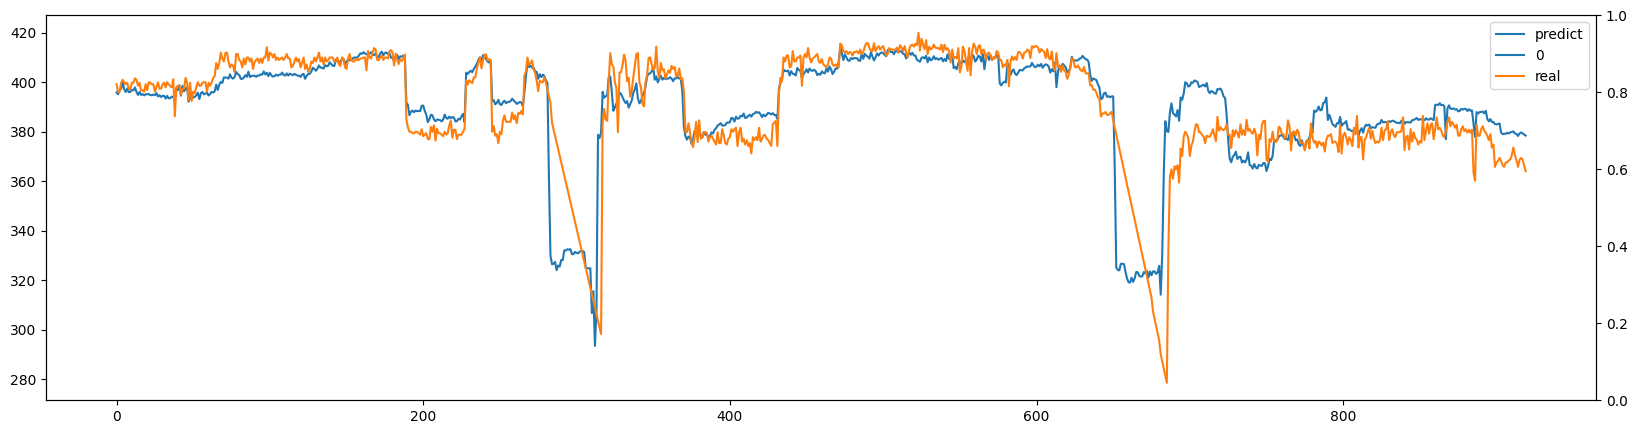

In [328]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
class MyLinear(nn.Module):
    def __init__(self):
        super(MyLinear, self).__init__()
        self.linear = nn.Linear(6, 1, bias=True)
        '''
        self.linear.weight = nn.Parameter(torch.tensor([ 0.02135562,  0.24494148,  0.14240979,  0.05458788,  0.03208539,
        0.34302825, -0.20057864, -0.25937453,  0.00670451,  0.07069019,
       -0.03957176, 0.97372054, -0.68005181, -0.23113583], dtype=torch.float).view(1, -1))'''
        self.linear.weight = nn.Parameter(torch.tensor([ 6.5,  -0.23,  0.35, -0.15, 0.051,0.05], dtype=torch.float).view(1, -1))
        self.linear.bias = nn.Parameter(torch.tensor([324], dtype=torch.float))
    def forward(self, x):
        out = self.linear(x)
        return out
# 모델 인스턴스 생성
model = MyLinear()
x2 = test_x.values
x2 = torch.Tensor(x2)
with torch.no_grad():
    y_pred = model(x2)
score = mean_absolute_error(test_y,y_pred)
print(score)
plt.figure(figsize=(20, 5))
sns.lineplot(y_pred, color = 'red', label='predict')
plt.legend(loc='lower right')
a = test_y.reset_index(drop=True)
a.plot(color='C1', label='real')
plt.legend(loc='upper right')
plt.twinx()
#TI23028(P/A RT T)	TI21022A(Catalyst T 1)	 두개만 건드림

In [8]:
import plotly
import matplotlib.pyplot as plt

In [114]:
test = pd.concat([test_x,test_y],axis=1)
test.corr()

,FIC23108(SS Flow),TI23120(F Zone T),TI23502(D/O Vapor T),TI23119(OV T),TI23118(D/O Liquid T),FIC23133(R/D Flow),DSL D-95
FIC23108(SS Flow),1.00000000000000000000,0.95330555953851847661,0.94304254460996028708,0.94218837889192319501,0.95354257298594036207,0.66144124802081838421,0.72412806697121689936
TI23120(F Zone T),0.95330555953851847661,1.00000000000000000000,0.97482573778647685359,0.98930114281406456023,0.98928065103917051104,0.69424366595737108110,0.67959712366056557187
TI23502(D/O Vapor T),0.94304254460996028708,0.97482573778647685359,1.00000000000000000000,0.97770378733456475562,0.98367309615856912686,0.80958579734248548032,0.77343871844835976326
TI23119(OV T),0.94218837889192319501,0.98930114281406456023,0.97770378733456475562,1.00000000000000000000,0.98270235223907931310,0.74358800307535999341,0.68931824174413136586
TI23118(D/O Liquid T),0.95354257298594036207,0.98928065103917051104,0.98367309615856912686,0.98270235223907931310,1.00000000000000000000,0.71752685853261732873,0.71788750353504149349
FIC23133(R/D Flow),0.66144124802081838421,0.69424366595737108110,0.80958579734248548032,0.74358800307535999341,0.71752685853261732873,1.00000000000000000000,0.72261672967099865872
DSL D-95,0.72412806697121689936,0.67959712366056557187,0.77343871844835976326,0.68931824174413136586,0.71788750353504149349,0.72261672967099865872,1.00000000000000000000


In [16]:
test_x

,TI23123(Reflux T),FI23107(OF Flow),FIC23104(Reflux F),FI23116(T-AR Flow 1),FI23117(T-AR Flow 2),PCA_1
0,40.58979999999999677129,0.00000000000000000000,85.94440000000000168257,181.88419999999999276952,304.46559999999999490683,-28.25997645258815893499
1,41.07770000000000010232,0.00000000000000000000,88.32359999999999899956,184.87100000000000932232,301.97079999999999699867,-29.62560707124482561881
2,40.93070000000000163709,0.00000000000000000000,86.24490000000000122782,180.68860000000000809450,302.91669999999999163265,-31.57429791937041940741
3,41.44200000000000017053,0.00000000000000000000,84.48940000000000338787,187.20099999999999340616,296.91039999999998144631,-33.87719521564623192944
4,41.40319999999999822649,0.00000000000000000000,83.89119999999999777174,182.64680000000001314220,300.44200000000000727596,-31.91114745051535805942
...,...,...,...,...,...,...
872,46.55499999999999971578,27.71880000000000165983,96.43049999999999499778,130.91599999999999681677,307.95370000000002619345,-97.19923278194823978993
873,46.32289999999999707825,28.15540000000000020464,93.60769999999999413376,130.55219999999999913598,303.63200000000000500222,-97.64263372458526646369
874,46.40319999999999822649,29.44549999999999911893,88.25350000000000250111,156.57349999999999567990,303.33760000000000900400,-109.35089098456003853244
875,46.74179999999999779448,28.51729999999999876081,77.46460000000000434284,166.55000000000001136868,294.01380000000000336513,-108.22000599127845532621


13.258005503970171


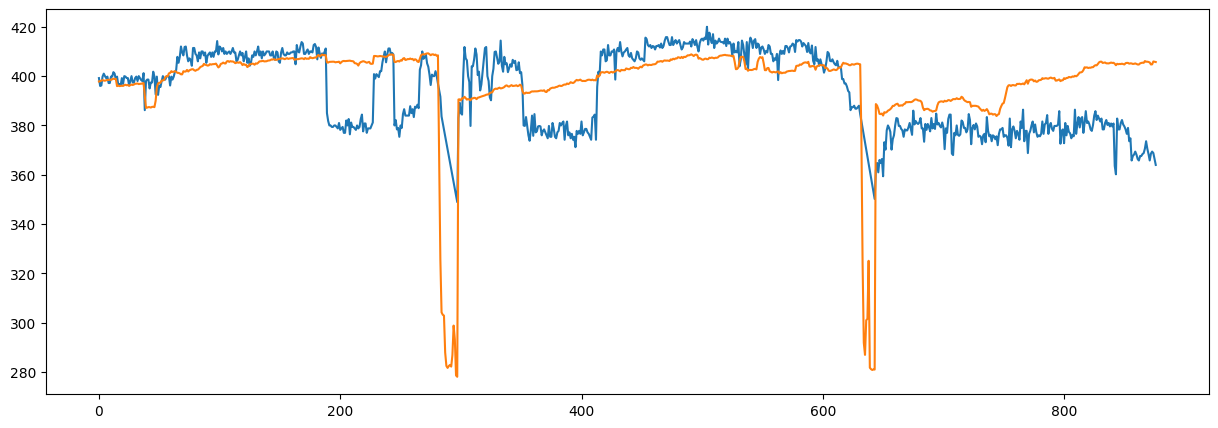

In [29]:
target = pd.Series(test_y)
a1, b1 = -0.1, 395
linear_pred1 = a1 * test_x.iloc[:,5] + b1
res1 = target - linear_pred1

plt.figure(figsize=(15, 5))
test_y.plot()
linear_pred1.plot()
print(abs(linear_pred1 - test_y).sum() / len(test_x))
#plt.ylim(350, 420)


11.445727021739128


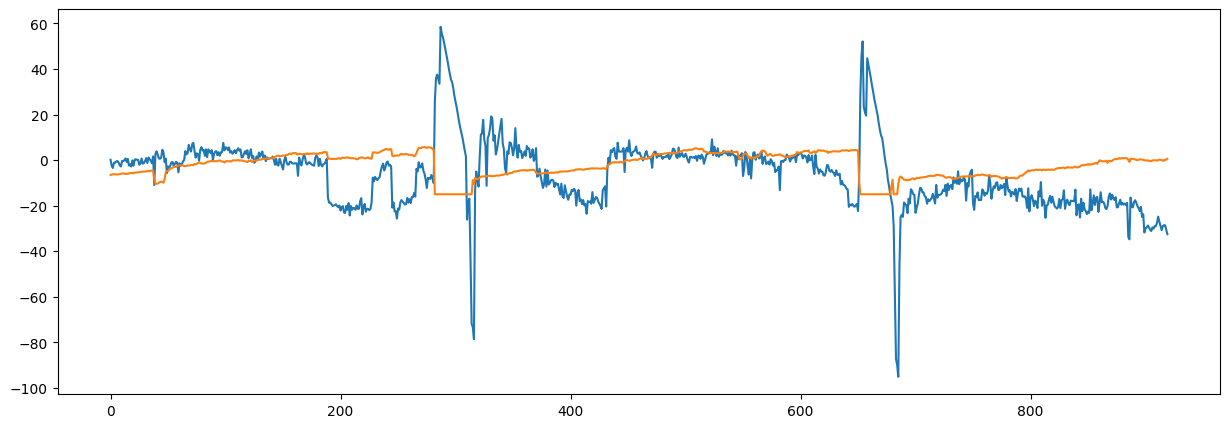

In [182]:
# res1.plot()

a1, b1 = 0.1, -15
linear_pred2 = a1 * test_x.iloc[:,1] + b1
res2 = res1 - linear_pred2

plt.figure(figsize=(15, 5))
res1.plot()
linear_pred2.plot()
print(abs(linear_pred2 - res1).sum() / len(test_x))
#plt.ylim(-20, 20)


11.00061580326087


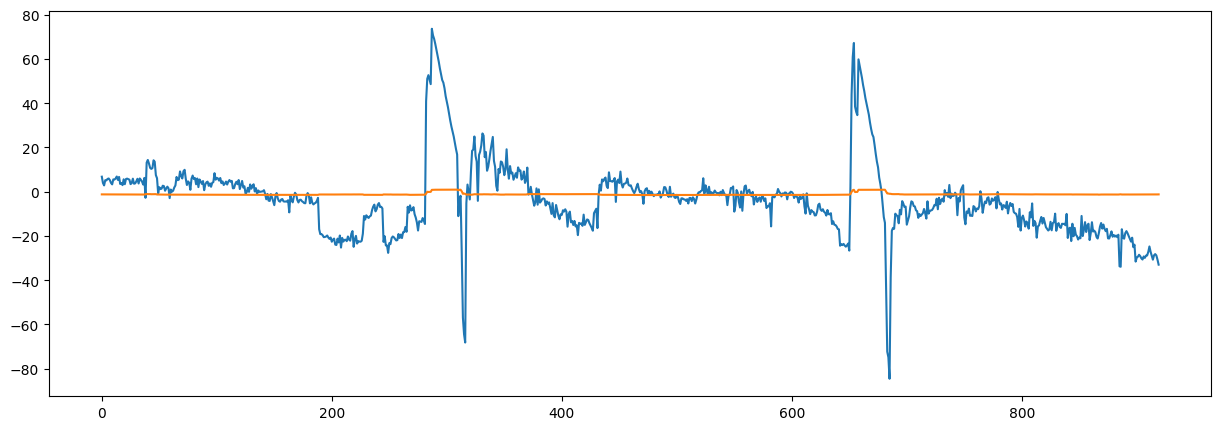

In [183]:
# res1.plot()

a1, b1 = -0.01, 1
linear_pred3 = a1 * test_x.iloc[:,2] + b1
res3 = res2 - linear_pred3

plt.figure(figsize=(15, 5))
res2.plot()
linear_pred3.plot()
print(abs(linear_pred3 - res2).sum() / len(test_x))
#plt.ylim(-20, 20)


14.585525707608697


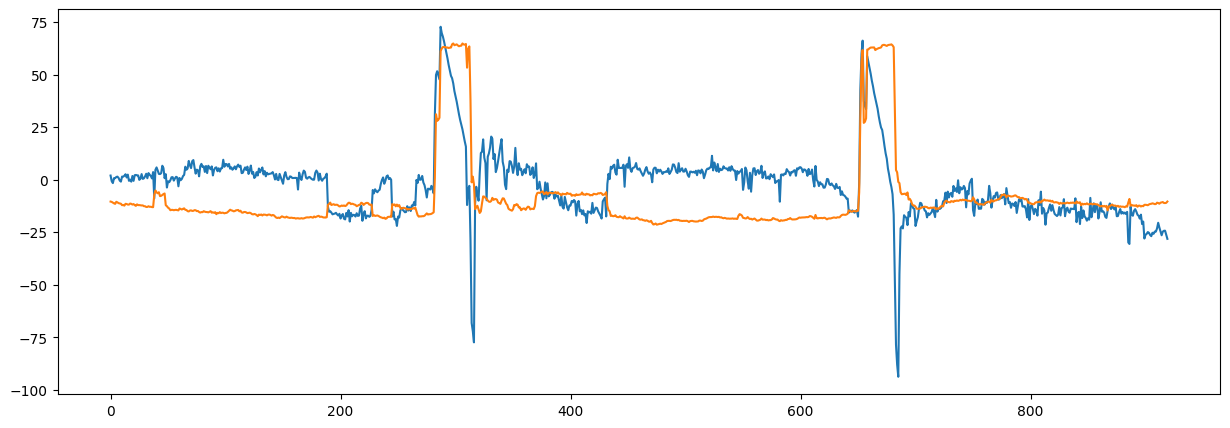

In [98]:
# res1.plot()

a1, b1 = -0.35, 70
linear_pred4 = a1 * test_x.iloc[:,3] + b1
res4 = res3 - linear_pred4

plt.figure(figsize=(15, 5))
res3.plot()
linear_pred4.plot()
print(abs(linear_pred4 - res3).sum() / len(test_x))
#plt.ylim(-20, 20)


14.481838936956521


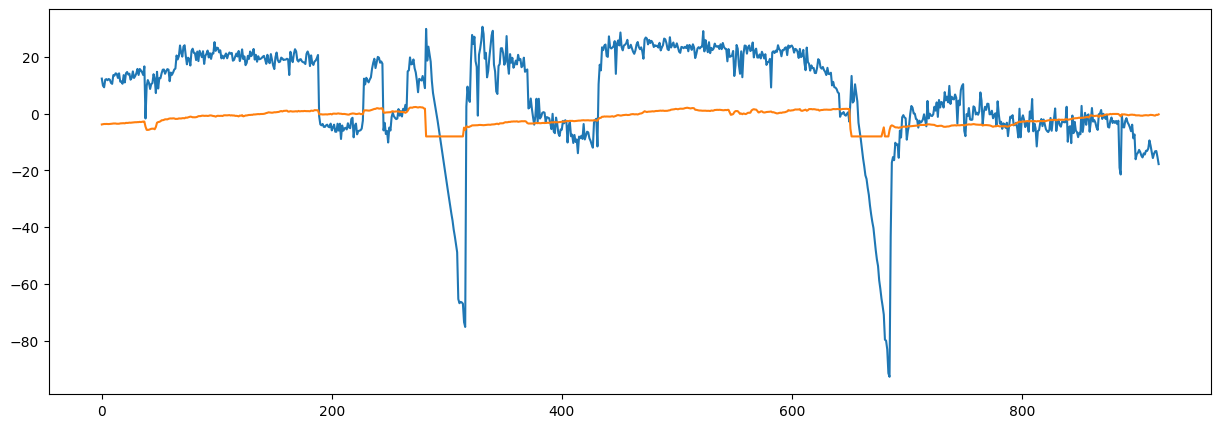

In [99]:
# res1.plot()

a1, b1 = 0.05, -8
linear_pred5 = a1 * test_x.iloc[:,4] + b1
res5 = res4 - linear_pred5

plt.figure(figsize=(15, 5))
res4.plot()
linear_pred5.plot()
print(abs(linear_pred5 - res4).sum() / len(test_x))
#plt.ylim(-20, 20)


7.764756079891305


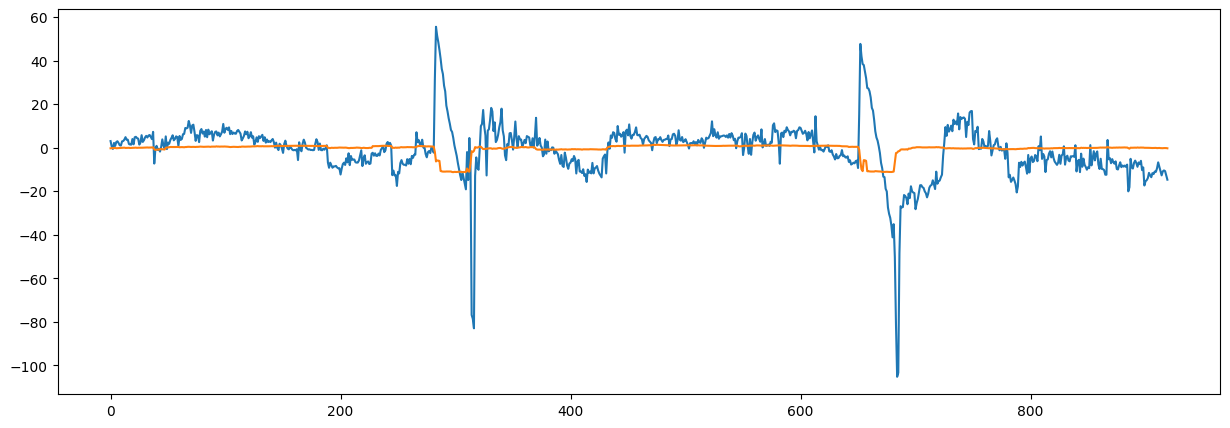

In [347]:
# res1.plot()

a1, b1 = 0.051, -12
linear_pred6 = a1 * test_x.iloc[:,4] + b1
res6 = res5 - linear_pred6
"""
    train_Yindex_PRED = 선형 대신에 --> tapnet(x_train, y[train_y.index](RES5).fit())
    train_Yindex_PRED = 선형 대신에 --> tapnet().predict(x_train))
    train_Yindex_PRED = 선형 대신에 --> tapnet().predict(x_train))

    Y-(LINEAR()) -(TAPNET(X, RES6))
"""

plt.figure(figsize=(15, 5))
res5.plot()
linear_pred6.plot()
print(abs(linear_pred6 - res5).sum() / len(test_x))
#plt.ylim(-20, 20)



In [336]:
abs(res5.sum()) / len(test_x) / 6

0.40786700534420123

In [102]:
train_x = train_x.drop(['FIC23133(R/D Flow)'],axis=1,inplace=True)
test_x = test_x.drop(['FIC23133(R/D Flow)'],axis=1,inplace=True)

19950.50795000003


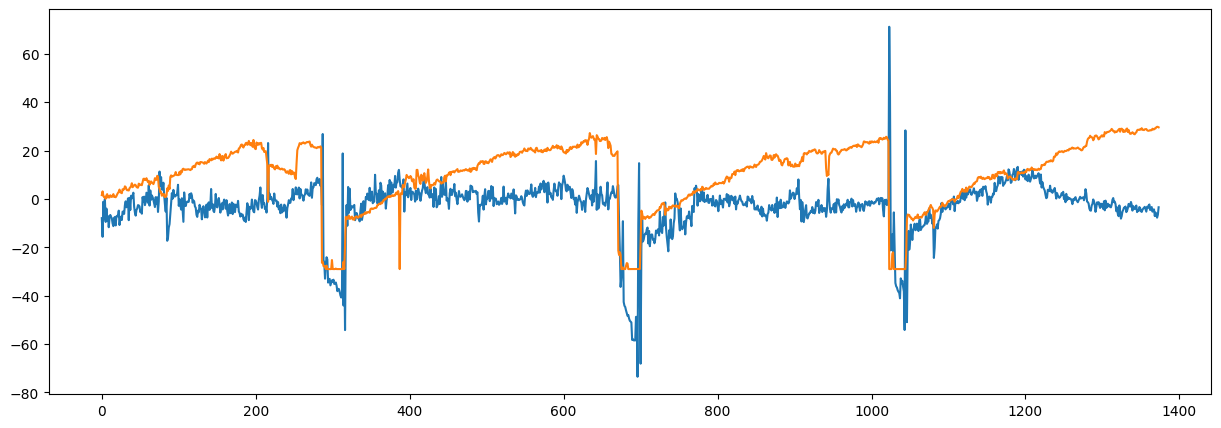

In [100]:
# res1.plot()

a1, b1 = 0.3, -29
linear_pred6 = a1 * train_x.iloc[:,5] + b1
res6 = res5 - linear_pred6

plt.figure(figsize=(15, 5))
res5.plot()
linear_pred6.plot()
print(abs(linear_pred6 - res5).sum())
#plt.ylim(-20, 20)


In [7]:
# res1.plot()

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [88]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x = train_x.index, y = train_x.iloc[:, 5], mode='lines+markers', name='tag1'), secondary_y=True)
fig.add_trace(go.Scatter(x = target.index,  y = target, mode='lines+markers', name='target'))
fig.update_layout(title='')
fig.show()

In [ ]:
pd.DataFrame(y_pred).describe()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
y_pred = y_pred.detach().numpy()
y_pred = pd.DataFrame(y_pred)

In [ ]:
pred1 = pd.DataFrame(pred1)

In [ ]:
import matplotlib.pyplot as plt
#output = output.detach().numpy()
#output = pd.DataFrame(output)
target_1 = test_y
target_2 = y_pred
target_1.describe()
target_2.describe()
plt.figure(figsize=(30,10))
plt.plot(target_1, label='target', color = 'b')
plt.plot(target_2, label='target', color = 'r')
plt.legend()
plt.xticks(fontsize=28)
plt.yticks(fontsize=28) 
plt.twinx()
plt.plot(-test_x.iloc[:,0], color='C1')
plt.ylim([-0.75, -0.5])
plt.show()

In [ ]:
test_x

### TabNet-B

In [61]:
!pip install pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetRegressor

In [62]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model = TabNetRegressor(n_d=64, n_a=64, n_steps=4, gamma=1.3, lambda_sparse=0, optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr=2e-2), mask_type='entmax', device_name=device)
model.fit( X_train=train_x.to_numpy(), y_train=train_y.to_numpy().reshape(-1,1), eval_set=[(train_x.to_numpy(), train_y.to_numpy().reshape(-1,1)), (test_x.to_numpy(), test_y.to_numpy().reshape(-1,1))],max_epochs=1000, patience=100)
test_x_np = test_x.values
y_pred = model.predict(test_x_np)
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,y_pred)
score

cpu
epoch 0  | loss: 162175.59375| val_0_mse: 129309.03538| val_1_mse: 111725.66841|  0:00:00s
epoch 1  | loss: 160528.96875| val_0_mse: 110967.80185| val_1_mse: 90358.95795|  0:00:00s
epoch 2  | loss: 158429.90625| val_0_mse: 120939.38604| val_1_mse: 83287.04349|  0:00:00s
epoch 3  | loss: 156366.1875| val_0_mse: 52878.23446| val_1_mse: 65341.469|  0:00:01s
epoch 4  | loss: 154382.42188| val_0_mse: 55799.08621| val_1_mse: 52866.99205|  0:00:01s
epoch 5  | loss: 152112.0625| val_0_mse: 71341.51048| val_1_mse: 43058.29856|  0:00:01s
epoch 6  | loss: 149781.98438| val_0_mse: 63185.63598| val_1_mse: 51653.21376|  0:00:01s
epoch 7  | loss: 146661.82812| val_0_mse: 62233.1202| val_1_mse: 38312.80109|  0:00:02s
epoch 8  | loss: 143898.64062| val_0_mse: 49755.34022| val_1_mse: 32922.76795|  0:00:02s
epoch 9  | loss: 141392.53125| val_0_mse: 39394.1371| val_1_mse: 16334.75528|  0:00:02s
epoch 10 | loss: 138397.6875| val_0_mse: 34609.45348| val_1_mse: 11134.58004|  0:00:02s
epoch 11 | loss: 135

16.157828546230448

### pycaret

In [9]:
from pycaret.regression import *

In [55]:
train_xy = pd.concat([train_x,train_y],axis=1)
test_xy = pd.concat([test_x,test_y],axis=1)
setup(data=train_xy,target = 'DSL D-95', test_data = test_xy,preprocess= False)

INFO:logs:PyCaret RegressionExperiment
INFO:logs:Logging name: reg-default-name
INFO:logs:ML Usecase: MLUsecase.REGRESSION
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 8141
INFO:logs:self.variable_keys: {'fold_param', 'imputation_classifier', '_ml_usecase', 'n_jobs_param', 'display_container', 'imputation_regressor', 'target_param', 'transform_target_param', 'experiment__', 'data', 'transform_target_method_param', 'X', 'seed', '_all_models', 'X_test', 'fold_groups_param_full', 'iterative_imputation_iters_param', '_all_metrics', 'y_train', 'X_train', 'log_plots_param', '_gpu_n_jobs_param', 'fold_generator', 'html_param', 'y', '_available_plots', 'fold_shuffle_param', 'exp_id', 'pipeline', 'variable_keys', 'idx', '_all_models_internal', 'gpu_param', 'stratify_param', 'memory', 'master_model_container', 'fold_groups_param', 'y_test', 'exp_name_log', 'USI', 'logging_param'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.9.13
INFO:logs:python_build:

,Description,Value
0,Session id,1861
1,Target,DSL D-95
2,Target type,regression
3,Data shape,"(2314, 31)"
4,Train data shape,"(2314, 31)"
5,Test data shape,"(903, 31)"
6,Numeric features,30


INFO:logs:setup() successfully completed in 0.26s...............


In [56]:
bm = compare_models(sort = 'mae')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,10.1000,192.4102,12.4073,-3.1932,0.0320,0.0257,0.1580
xgboost,Extreme Gradient Boosting,10.9106,225.9899,13.6615,-4.3655,0.0352,0.0277,0.1530
omp,Orthogonal Matching Pursuit,11.0009,218.4184,13.5006,-2.3897,0.0349,0.0283,0.0090
et,Extra Trees Regressor,11.0637,215.0475,13.1962,-2.9321,0.0339,0.0281,0.1240
rf,Random Forest Regressor,11.1106,232.4085,13.6986,-4.1773,0.0353,0.0282,0.3300
catboost,CatBoost Regressor,11.1599,221.3302,13.4630,-2.9282,0.0346,0.0285,1.8640
dummy,Dummy Regressor,11.2824,242.6133,13.7165,-2.4036,0.0356,0.0293,0.0080
llar,Lasso Least Angle Regression,11.2824,242.6133,13.7165,-2.4036,0.0356,0.0293,0.0060
lightgbm,Light Gradient Boosting Machine,11.5522,249.4908,14.3284,-4.7048,0.0369,0.0293,0.0400
knn,K Neighbors Regressor,11.6398,264.3492,15.4375,-4.9001,0.0399,0.0299,0.0110


INFO:logs:master_model_container: 20
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(random_state=1861)
INFO:logs:compare_models() successfully completed......................................


In [58]:
cm = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.8074,24.1722,4.9165,0.5688,0.0123,0.0096
1,9.0359,126.7082,11.2565,-0.4119,0.0286,0.0228
2,10.5394,158.4641,12.5883,-1.4877,0.0318,0.0263
3,3.4338,19.8677,4.4573,-1.1214,0.0110,0.0085
4,5.0171,41.2660,6.4239,-0.8212,0.0159,0.0124
5,12.2360,470.0167,21.6799,-30.6700,0.0586,0.0304
6,13.4046,211.6519,14.5483,-1.6127,0.0365,0.0331
7,12.2896,267.3091,16.3496,0.3614,0.0437,0.0326
8,22.1143,553.5474,23.5276,0.1746,0.0595,0.0548
9,19.2278,451.0815,21.2387,-6.7534,0.0549,0.0513


INFO:logs:master_model_container: 21
INFO:logs:display_container: 3
INFO:logs:RandomForestRegressor(n_jobs=-1, random_state=1861)
INFO:logs:create_model() successfully completed......................................


In [59]:
y_pred = predict_model(cm, data = test_x)
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,y_pred['Label'])
score

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(n_jobs=-1, random_state=1861), probability_threshold=None, encoded_labels=False, raw_score=False, drift_report=False, round=4, verbose=True, ml_usecase=None, display=None, replace_labels_in_column=<function _SupervisedExperiment.predict_model.<locals>.replace_labels_in_column at 0x0000021085D2DF70>, self=<pycaret.regression.oop.RegressionExperiment object at 0x00000210DF2A30D0>)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


0.9670348854534802

### AutoGluon

In [5]:
!pip install AutoGluon

  Using cached autogluon-0.7.0-py3-none-any.whl (9.7 kB)
  Using cached autogluon.timeseries-0.7.0-py3-none-any.whl (108 kB)
  Using cached autogluon.multimodal-0.7.0-py3-none-any.whl (331 kB)
  Using cached autogluon.features-0.7.0-py3-none-any.whl (60 kB)
  Using cached autogluon.core-0.7.0-py3-none-any.whl (218 kB)
  Using cached autogluon.tabular-0.7.0-py3-none-any.whl (292 kB)
  Using cached autogluon.common-0.7.0-py3-none-any.whl (45 kB)
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
  Using cached ray-2.2.0-cp39-cp39-win_amd64.whl (20.8 MB)
  Using cached fairscale-0.4.13-py3-none-any.whl
  Using cached pytorch_lightning-1.9.4-py3-none-any.whl (827 kB)
  Using cached torchvision-0.14.1-cp39-cp39-win_amd64.whl (1.1 MB)
  Using cached tensorboard-2.12.0-py3-none-any.whl (5.6 MB)
  Using cached timm-0.6.12-py3-none-any.whl (549 kB)
  Using cached pytorch_metric_learning-1.7.3-py3-none-any.whl (112 kB)
  Using cached accelerate-0.16.0-py3-none-any.whl (199 kB)
  Using c

ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [4]:
train_xy = pd.concat([train_x,train_y],axis=1)
train_xy = train_xy.reset_index()
train_xy

,index,TI23123(Reflux T),FI23107(OF Flow),FIC23104(Reflux F),FI23116(T-AR Flow 1),PCA_1,kf_X_TI23123(Reflux T),kf_X_FI23107(OF Flow),kf_X_FIC23104(Reflux F),kf_X_FI23116(T-AR Flow 1),...,kf_X_TI23123(Reflux T)_median_30,kf_X_FI23107(OF Flow)_mean_30,kf_X_FI23107(OF Flow)_median_30,kf_X_FIC23104(Reflux F)_mean_30,kf_X_FIC23104(Reflux F)_median_30,kf_X_FI23116(T-AR Flow 1)_mean_30,kf_X_FI23116(T-AR Flow 1)_median_30,kf_X_PCA_1_mean_30,kf_X_PCA_1_median_30,DSL D-95
0,0,42.48020000000000351292,21.24530000000000029559,92.09180000000000632099,153.68760000000000331966,-36.07333189746491086680,42.37925187045006225617,21.19730673322692382499,91.86713216985619112620,153.30932668376343031014,...,42.37925187045006225617,21.19730673322692382499,21.19730673322692382499,91.86713216985619112620,91.86713216985619112620,153.30932668376343031014,153.30932668376343031014,-35.97838593275171348296,-35.97838593275171348296,396.60000000000002273737
1,1,43.30870000000000175078,20.90020000000000166551,87.64549999999999840838,142.48369999999999890861,-43.36708586284115796161,43.49524905508017980083,20.99604774904500104071,88.12160441706521396554,143.32132550967651241081,...,43.49524905508017980083,20.99604774904500104071,20.99604774904500104071,88.12160441706521396554,88.12160441706521396554,143.32132550967651241081,143.32132550967651241081,-43.47944521374234483346,-43.47944521374234483346,396.60000000000002273737
2,2,43.03150000000000119371,23.31129999999999924398,92.23000000000000397904,129.77770000000001004992,-43.86595533992221618291,43.34767251485501304842,22.90766306010153385841,91.01530385942662348953,130.59564239320118872456,...,43.34767251485501304842,22.90766306010153385841,22.90766306010153385841,91.01530385942662348953,91.01530385942662348953,130.59564239320118872456,130.59564239320118872456,-45.10465346601434788454,-45.10465346601434788454,401.00000000000000000000
3,3,43.96770000000000067075,26.91159999999999996589,92.35590000000000543423,99.16549999999999442934,-48.92306704840332542972,43.92366685278255289404,26.04102847149922794756,92.10396952886408428185,105.29303839387367247582,...,43.92366685278255289404,26.04102847149922794756,26.04102847149922794756,92.10396952886408428185,92.10396952886408428185,105.29303839387367247582,105.29303839387367247582,-48.99613914179607121469,-48.99613914179607121469,391.80000000000001136868
4,4,44.36889999999999645297,27.44750000000000156319,91.59369999999999834017,77.52630000000000620730,-56.64149970063294148304,44.39792678792971258872,27.67724551540934996297,92.10087953598002741273,81.77030362776989136364,...,44.39792678792971258872,27.67724551540934996297,27.67724551540934996297,92.10087953598002741273,92.10087953598002741273,81.77030362776989136364,81.77030362776989136364,-55.17531104225209759306,-55.17531104225209759306,402.19999999999998863132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,1406,41.53309999999999746478,0.00000000000000000000,87.45569999999999311058,183.63390000000001123226,-24.89670906750073342550,43.97297098053002173401,-5.21439525949147686390,95.23980038600794273407,175.60086991257173849590,...,45.42111917705237544851,0.20958785979425714752,-6.92333864930611397881,83.28420565914663598051,88.24836269079233375123,214.59935334209774282499,186.68341380078973656964,-124.69246421771443067428,-150.83194917622265052159,394.19999999999998863132
1407,1407,39.66210000000000235332,0.00000000000000000000,81.89499999999999602096,177.01769999999999072315,-27.58193354917859707598,43.37440074086212149496,-4.68181404062535744259,93.89779812704729522466,175.27209034365989737125,...,45.42111917705237544851,-1.27946454106622975466,-6.92333864930611397881,85.03606324532087512580,89.97791555724177214870,209.25201422253076088964,181.37554130261054297080,-133.68906793263025178931,-150.83194917622265052159,399.80000000000001136868
1408,1408,40.61869999999999691909,0.00000000000000000000,81.79869999999999663487,167.80330000000000723048,-28.02184629578647445669,42

In [5]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score  
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, train_test_split

train_xy = pd.concat([train_x,train_y],axis=1)
#train_xy = train_xy.reset_index()
train_data = TabularDataset(train_xy)
test_data = TabularDataset(test_x)
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
#그룹을 프로덕트 코드로 하면 성능 향상
predictor = TabularPredictor(label='DSL D-95',  eval_metric='mean_absolute_error').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0})
#predictor = TabularPredictor(label='Y_Class',  eval_metric='f1_macro',groups = 'PRODUCT_CODE', sample_weight = 'auto_weight').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0})
#predictor = TabularPredictor(label='Y_Class', eval_metric='f1_macro').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0},
#    num_bag_folds=5, num_bag_sets=1, num_stack_levels=1,
#    hyperparameters = {'NN_TORCH': {'num_epochs': 2}, 'GBM': {'num_boost_round': 20}},  # last  argument is just for quick demo here, omit it in real applications
#)
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
y_pred = predictor.predict(test_data)
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
y_pred

No path specified. Models will be saved in: "AutogluonModels\ag-20230303_080014\"
Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230303_080014\"
AutoGluon Version:  0.7.0
Python Version:     3.9.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    1411
Train Data Columns: 30
Label Column: DSL D-95
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (418.8, 364.8, 402.18504, 7.13567)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the 

==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================


	-2.2238	 = Validation score   (-mean_absolute_error)
	3.88s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1 ...
	-2.1571	 = Validation score   (-mean_absolute_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ...
		The model requires minimum cpu 1, but you only specified 0
Detailed Traceback:
Traceback (most recent call last):
  File "c:\Users\ineeji\anaconda3\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1502, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "c:\Users\ineeji\anaconda3\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1447, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "c:\Users\ineeji\anaconda3\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 70

==================learning_complete========================
==================learning_complete========================
==================learning_complete========================
==================learning_complete========================
==================learning_complete========================
==================learning_complete========================
==================predictor_complete========================
==================predictor_complete========================
==================predictor_complete========================
==================predictor_complete========================
==================predictor_complete========================
==================submission_complete========================
==================submission_complete========================
==================submission_complete========================
==================submission_complete========================
==================submission_complete========================
==================submiss

0      401.68533325195312500000
1      401.65737915039062500000
2      401.07852172851562500000
3      401.94656372070312500000
4      401.81845092773437500000
                 ...           
898    405.02603149414062500000
899    404.79031372070312500000
900    406.32452392578125000000
901    406.47308349609375000000
902    406.34826660156250000000
Name: DSL D-95, Length: 903, dtype: float32

In [8]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_pred,test_y)
score

16.149419111587676

# Catboost optuna

In [7]:
!pip3 install catboost

In [60]:
from catboost import *
import optuna
from optuna.samplers import TPESampler
from optuna import Trial
from sklearn.metrics import mean_absolute_error

#kfold = StratifiedKFold(n_splits=10, shuffle=True)


def objective(trial):
    params = {
            'iterations':trial.suggest_int("iterations", 300, 1000),
            'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
            'depth': trial.suggest_int('depth',5, 16),
            'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
            'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
            'subsample': trial.suggest_uniform('subsample',0.3,1),
            'random_strength': trial.suggest_uniform('random_strength',10,100),
            'od_wait':trial.suggest_int('od_wait', 10, 150),
            'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,20),
            'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 1, 100),
            "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0., 1.0),
            'random_state' : 9555,
            'verbose' : 0,
        }
    #'task_type' : 'GPU',
    #"eval_metric":'RMSE',

    cat = CatBoostRegressor(**params)
    
    cat.fit(train_x, train_y, eval_set=[(test_x,test_y)],
              verbose=False)
    '''
    cat.fit(train_x, train_y, 
              verbose=False)'''
    cat_pred = cat.predict(test_x)
    score = mean_absolute_error(test_y, cat_pred)
    print("score : %lf"%score)
    return score

study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50000, show_progress_bar=True)

#study.optimize(lambda trial: objective_xgb(trial, train_x, train_y), n_trials=100)
print('Best trial: score {},\nparams {}'.format(study.best_trial.value, study.best_trial.params))


param = study.best_trial.params
param

[I 2023-03-03 17:10:10,967] A new study created in memory with name: no-name-131c5d83-ca40-4897-85d4-875c062c10c3


  0%|          | 0/50000 [00:00<?, ?it/s]

score : 16.993695
[I 2023-03-03 17:10:11,885] Trial 0 finished with value: 16.993695096902222 and parameters: {'iterations': 702, 'learning_rate': 0.16328612390316738, 'depth': 11, 'min_data_in_leaf': 19, 'reg_lambda': 30.804156693273335, 'subsample': 0.9624211439607933, 'random_strength': 48.64053679498016, 'od_wait': 45, 'leaf_estimation_iterations': 10, 'bagging_temperature': 42.26355288847631, 'colsample_bylevel': 0.13847814256640367}. Best is trial 0 with value: 16.993695096902222.
score : 17.116800
[I 2023-03-03 17:10:15,287] Trial 1 finished with value: 17.11679990287204 and parameters: {'iterations': 634, 'learning_rate': 0.22846159627814033, 'depth': 13, 'min_data_in_leaf': 11, 'reg_lambda': 86.26902124729199, 'subsample': 0.8974494289508694, 'random_strength': 95.61972272640958, 'od_wait': 31, 'leaf_estimation_iterations': 19, 'bagging_temperature': 5.1465701084148625, 'colsample_bylevel': 0.2590553313703988}. Best is trial 0 with value: 16.993695096902222.
score : 16.721141


KeyboardInterrupt: 

In [ ]:
param = {'iterations': 9, 'learning_rate': 0.9372678851171892, 'depth': 14, 'min_data_in_leaf': 5, 'reg_lambda': 54.3769536799371, 'subsample': 0.5407244922934562, 'random_strength': 99.99058766840834, 'od_wait': 79, 'leaf_estimation_iterations': 3, 'bagging_temperature': 40.14645762792634, 'colsample_bylevel': 0.16397102303317954}

In [353]:
#eval_set으로 해서 한번 더 피팅 한 다음에 bestIteration = 7, Shrink model to first 8 iterations. 7 or 8로 이터레이션 값 대체
cat = CatBoostRegressor(**param,random_state = 9555)
#cat.fit(train_x, train_y, eval_set = [(test_x,test_y)])
cat.fit(train_x, train_y)

pred = cat.predict(test_x)
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,pred)
score

0:	learn: 5.5252413	total: 1.85ms	remaining: 665ms
1:	learn: 4.6775269	total: 3.83ms	remaining: 685ms
2:	learn: 4.2774465	total: 5.76ms	remaining: 685ms
3:	learn: 3.9890157	total: 7.56ms	remaining: 673ms
4:	learn: 3.9385218	total: 9.08ms	remaining: 645ms
5:	learn: 3.8304243	total: 10.6ms	remaining: 627ms
6:	learn: 3.7796102	total: 12.4ms	remaining: 626ms
7:	learn: 3.7653584	total: 14.1ms	remaining: 619ms
8:	learn: 3.7030894	total: 15.6ms	remaining: 610ms
9:	learn: 3.6800342	total: 17.2ms	remaining: 604ms
10:	learn: 3.6688277	total: 19ms	remaining: 602ms
11:	learn: 3.6422690	total: 20.6ms	remaining: 598ms
12:	learn: 3.5834719	total: 22.3ms	remaining: 596ms
13:	learn: 3.5454899	total: 23.8ms	remaining: 589ms
14:	learn: 3.5007142	total: 25.4ms	remaining: 585ms
15:	learn: 3.4725395	total: 26.9ms	remaining: 578ms
16:	learn: 3.3991612	total: 28.3ms	remaining: 571ms
17:	learn: 3.3305092	total: 29.9ms	remaining: 569ms
18:	learn: 3.1210061	total: 31.5ms	remaining: 565ms
19:	learn: 3.0884190	tot

7.42177514401278

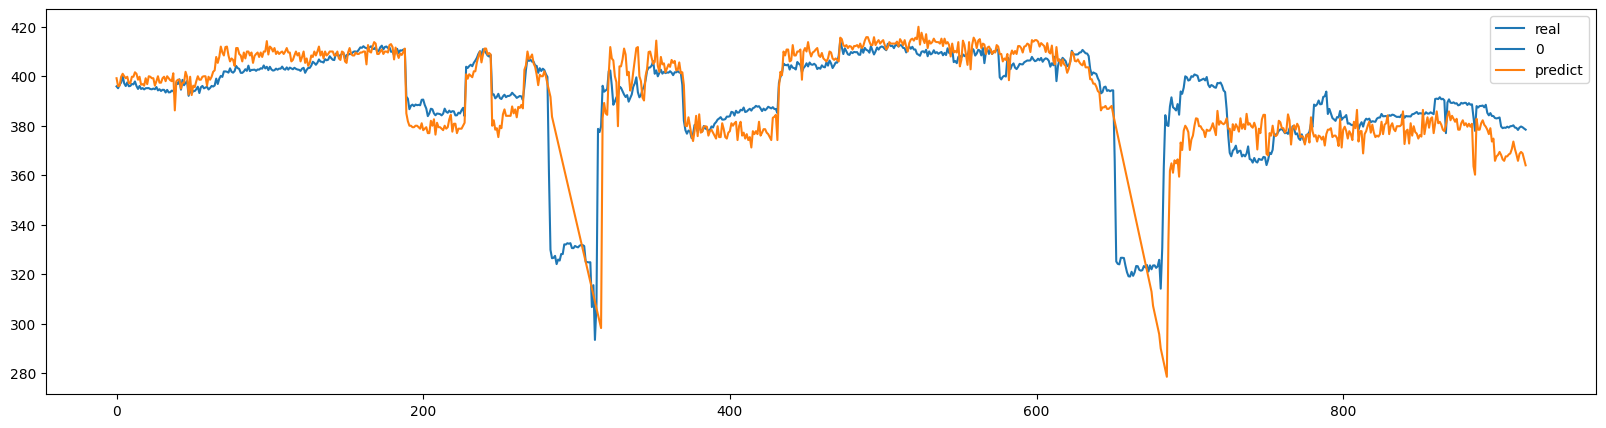

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 5))
#b = y_pred.reset_index(drop = True)
sns.lineplot(y_pred, color = 'red', label='real')
plt.legend(loc='lower right')
#plt.twinx()
a = test_y.reset_index(drop=True)
a.plot(color='C1', label='predict')
plt.legend(loc='upper right')
#plt.ylim([315, 535])

# AutoEncoder

In [ ]:
train_x.shape[1]

In [ ]:
a = train_x.shape[1].values
b = train_y.values
a = torch.tensor(a)
b = torch.tensor(b)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

#train_x = torch.tensor(train_x.values, dtype=torch.float)
#train_y = torch.tensor(train_y.values, dtype=torch.float)
#test_x = torch.tensor(test_x.values, dtype=torch.float)

input_dim = 14
hidden_dim = 5
autoencoder = Autoencoder(input_dim, hidden_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
num_epochs = 100

for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    x_pred = autoencoder(train_x)
    loss = criterion(x_pred, train_x)
    loss.backward()
    optimizer.step()

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
num_epochs = 1000
linear_regression = LinearRegression(hidden_dim, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(linear_regression.parameters(), lr=0.001)

for epoch in range(num_epochs):
    linear_regression.train()
    optimizer.zero_grad()
    x_encoded = autoencoder.encoder(train_x)
    y_pred = linear_regression(x_encoded)
    loss = criterion(y_pred, train_y.unsqueeze(1))
    loss.backward()
    optimizer.step()

with torch.no_grad():
    autoencoder.eval()
    linear_regression.eval()
    x_encoded_test = autoencoder.encoder(test_x)
    y_pred_test = linear_regression(x_encoded_test)
    #test_loss = criterion(y_pred_test, y_test.unsqueeze(1))
    #print(f"Test loss: {test_loss:.4f}")

In [ ]:
y_pred_test.numpy()

# Prophet

In [ ]:
from fbprophet import Prophet

# Prophet 모델 객체 생성
model = Prophet()

train = pd.concat([train_x,train_y],axis=1)
col = train.drop(['Unnamed: 0'],axis=1).columns

# 학습할 데이터 프레임 생성 (ds: 날짜, y: 시계열 데이터)
train_df = pd.DataFrame({'ds': ['Unnamed: 0'], 'y': [col]})

# 모델 학습
model.fit(train_df)

# 향후 예측을 위한 데이터프레임 생성
future = model.make_future_dataframe(periods=365)

# 예측
forecast = model.predict(future)

# LR_HandMade

# RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from catboost import *
from sklearn.linear_model import LinearRegression

#train_x.drop(['Unnamed: 0'],axis=1,inplace=True)
#test_x.drop(['Unnamed: 0'],axis=1,inplace=True)


model = LinearRegression()

selector = RFE(model, step=1,n_features_to_select = 3)
selector = selector.fit(train_x, train_y)

# 선택된 feature들의 index를 추출합니다.
selected_features = selector.get_support(indices=True)
selected_features

In [ ]:
#TI23123(Reflux T)	 쓸모 없어 보임
from sklearn.metrics import mean_absolute_error
z = train_x.iloc[:, selected_features]
c = test_x.iloc[:, selected_features]
model.fit(z, train_y)
y_pred = model.predict(c)
#a = np.exp(y_pred)
#b = np.exp(test_y)
score = mean_absolute_error(y_pred,test_y)
score

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from catboost import *
from sklearn.linear_model import LinearRegression

for i in range(1,len(train_x.columns)):
    model = LinearRegression()

    selector = RFE(model, step=1,n_features_to_select = i)
    #selector = RFECV(model, step=i)
    selector = selector.fit(train_x, train_y)

    # 선택된 feature들의 index를 추출합니다.
    selected_features = selector.get_support(indices=True)
    from sklearn.metrics import mean_absolute_error
    z = train_x.iloc[:, selected_features]
    c = test_x.iloc[:, selected_features]
    model.fit(z, train_y)
    y_pred = model.predict(c)
    #a = np.exp(y_pred)
    #b = np.exp(test_y)
    score = mean_absolute_error(y_pred,test_y)
    print(i, score)

# Linear Regression

In [ ]:
train_x = train_x.iloc[:, selected_features]
test_x = test_x.iloc[:, selected_features]

In [207]:
train_x = train.drop(['DSL D-95'],axis=1)
train_y = train['DSL D-95']

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#train_x.drop(['Unnamed: 0'],axis=1,inplace=True)
#test_x.drop(['Unnamed: 0'],axis=1,inplace=True)

model = LinearRegression().fit(train_x,train_y)
y_pred1 = model.predict(train_x)
y_pred = model.predict(test_x)
score = mean_absolute_error(y_pred,test_y)
score

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [202]:
import seaborn as sns

<Axes: >

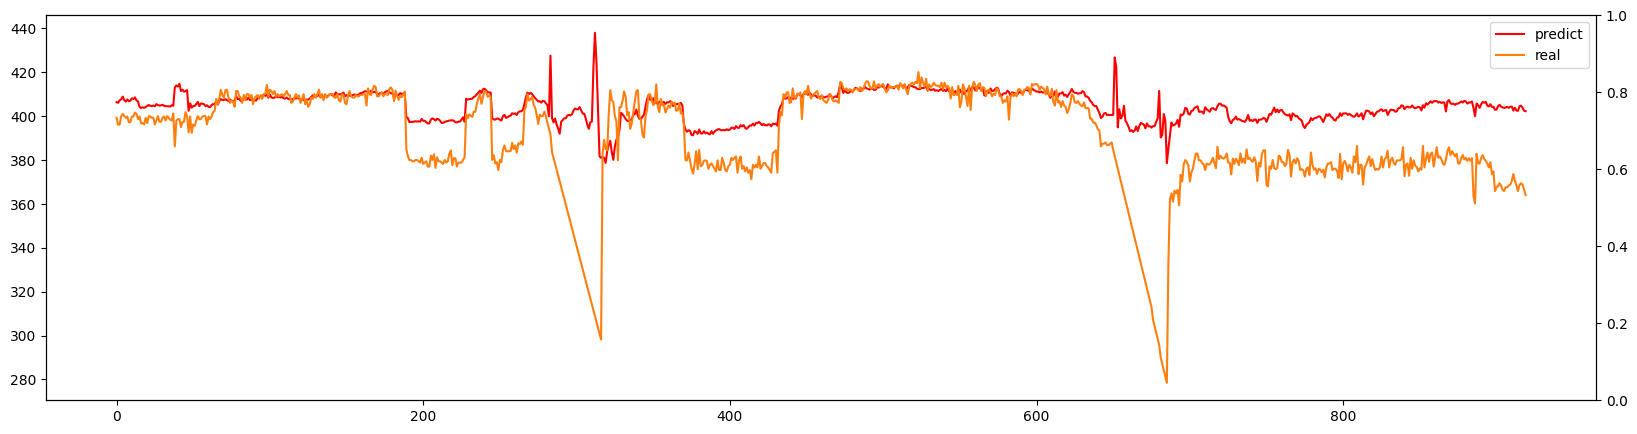

In [214]:
plt.figure(figsize=(20, 5))
sns.lineplot(y_pred, color = 'red', label='predict')
plt.legend(loc='lower right')
#plt.twinx()
a = test_y.reset_index(drop=True)
a.plot(color='C1', label='real')
plt.legend(loc='upper right')
plt.twinx()

In [226]:
print()
print(y_pred.shape, y_pred1.shape)
print(test_y.shape, train_y.shape)
pred = pd.concat([y_pred1, y_pred], axis=0)
real = pd.concat([pd.DataFrame(train_y), pd.DataFrame(test_y)])
print(type(pred), type(real), pred.shape, real.shape)



(920, 1) (1266, 1)
(920,) (1266,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> (2186, 1) (2186, 1)


In [232]:
pred = pred.reset_index(drop = True)

In [231]:
real=real.reset_index(drop=True)
pred

,0
0,398.15138983641418235493
1,400.92886337953677866608
2,398.03705007876124000177
3,397.92057267358995886752
4,398.35548678660734367440
...,...
915,404.45008175469092748244
916,404.75855207902986876434
917,403.77998029363743626163
918,402.38934638961200107588


In [239]:
real.values.reshape(-1)

array([396.6, 396.6, 401. , ..., 368.8, 366.4, 364. ])

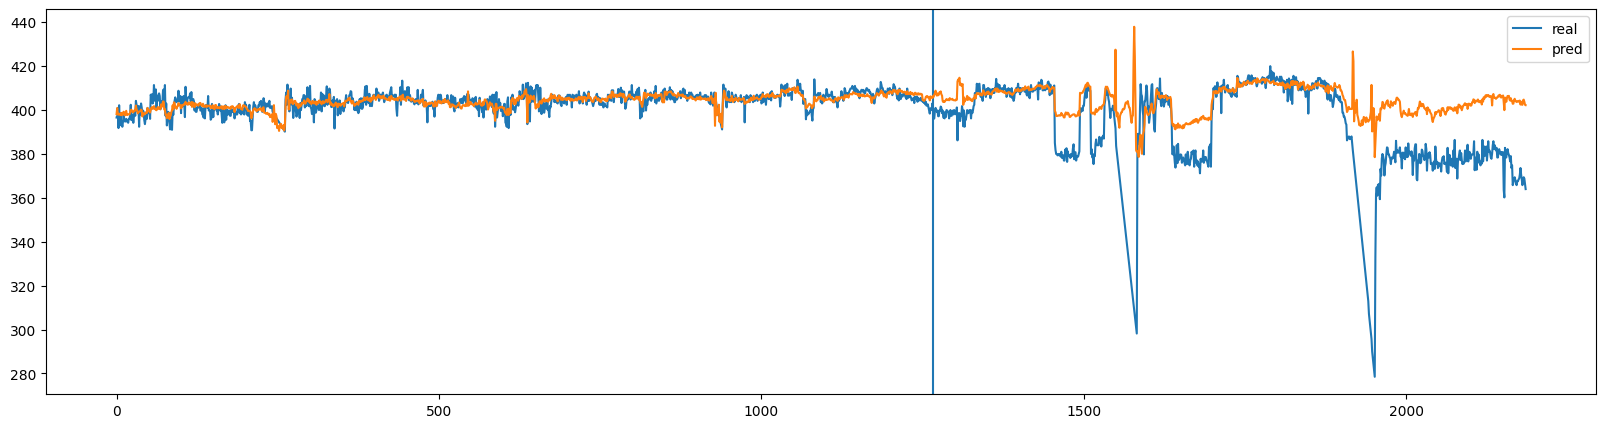

In [247]:
plt.figure(figsize=(20, 5))
sns.lineplot(real.values.reshape(-1), color = 'C0', label='real')
plt.axvline(len(train_y))
sns.lineplot(pred.values.reshape(-1), color = 'C1', label='pred')
# plt.xlim(0, 500)
#plt.ylim(360, 420)
plt.legend(loc='upper right')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
c = test_x.reset_index(drop = True)
d = train_x.reset_index(drop = True)
for col in c.columns[:]:
  try:
    #print(col)
    plt.figure(figsize=(20, 5))
    sns.lineplot(y_pred, color = 'red', label='predict')
    plt.legend(loc='lower right')
    #plt.twinx()
    a = test_y.reset_index(drop=True)
    a.plot(color='C1', label='real')
    c[col].plot(label=col)
    #d[col].plot(label=col)
    plt.legend(loc='upper right')
    plt.twinx()
    #plt.ylim([315, 535])
  except:
    continue

In [ ]:
test_x

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
c = test_x.reset_index(drop = True)
d = train_x.reset_index(drop = True)
for col in test_x.columns[:]:
  try:
    #print(col)
    plt.figure(figsize=(20, 5))
    sns.lineplot(train_y, color = 'red', label='Y')
    plt.legend(loc='lower right')
    #plt.twinx()
    #a = test_y.reset_index(drop=True)
    #a.plot(color='C1', label='real')
    #c[col].plot(label=col)
    d[col].plot(label=col)
    plt.legend(loc='upper left',fontsize = 8)
    plt.twinx()
    #plt.ylim([315, 535])
  except:
    continue

In [109]:
!pip install pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetRegressor

In [110]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = TabNetRegressor(n_d=8, n_a=8, n_steps=4, gamma=1.3, lambda_sparse=0, optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr=2e-2), mask_type='entmax', device_name=device)
model.fit( X_train=train_x.to_numpy(), y_train=train_y.to_numpy().reshape(-1,1), eval_set=[(train_x.to_numpy(), train_y.to_numpy().reshape(-1,1)), (test_x.to_numpy(), test_y.to_numpy().reshape(-1,1))],max_epochs=1000, patience=100)
test_x_np = test_x.values
y_pred = model.predict(test_x_np)
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,y_pred)
score

c:\Users\ineeji\anaconda3\envs\torch_1\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 155595.33286| val_0_mse: 74364.67595| val_1_mse: 71759.78658|  0:00:07s
epoch 1  | loss: 114562.5464| val_0_mse: 79606.74281| val_1_mse: 64169.03328|  0:00:11s
epoch 2  | loss: 32209.51963| val_0_mse: 168118.96489| val_1_mse: 177660.40286|  0:00:15s
epoch 3  | loss: 577.16535| val_0_mse: 4103.81979| val_1_mse: 4296.03303|  0:00:18s
epoch 4  | loss: 91.21414| val_0_mse: 6019.54545| val_1_mse: 6374.45378|  0:00:22s
epoch 5  | loss: 57.36559| val_0_mse: 5237.29809| val_1_mse: 5734.26476|  0:00:25s
epoch 6  | loss: 32.76937| val_0_mse: 2167.41053| val_1_mse: 2332.64409|  0:00:29s
epoch 7  | loss: 28.66661| val_0_mse: 686.75298| val_1_mse: 793.29629|  0:00:33s
epoch 8  | loss: 25.52452| val_0_mse: 387.6794| val_1_mse: 520.89878|  0:00:37s
epoch 9  | loss: 24.45052| val_0_mse: 183.40847| val_1_mse: 299.84092|  0:00:40s
epoch 10 | loss: 27.86715| val_0_mse: 42.94328| val_1_mse: 162.51883|  0:00:44s
epoch 11 | loss: 22.89945| val_0_mse: 46.41272| val_1_mse: 119.64713|  0:00:48

### pycaret

In [3]:
from pycaret.regression import *

In [40]:
import pycaret
print(pycaret.__version__)

3.0.0


In [31]:
train_xy.describe()

,TI23123(Reflux T),FI23107(OF Flow),FIC23104(Reflux F),FI23116(T-AR Flow 1),FI23117(T-AR Flow 2),PCA_1,DSL D-95
count,1449.00000000000000000000,1449.00000000000000000000,1449.00000000000000000000,1449.00000000000000000000,1449.00000000000000000000,1449.00000000000000000000,1449.00000000000000000000
mean,43.53172608695656009559,28.76995203588681704332,84.17910186335404887359,126.90705672877852805414,274.32282836438974982229,-0.00000000000000285394,401.91038647342918466165
std,10.33146361618149988715,9.73303871210940130254,23.16741726782158394826,75.97650375301736858091,101.61921064283652071936,300.54479324148701380182,7.63072760987181641923
min,3.70179999999999997939,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,-174.48265373710623293846,364.80000000000001136868
25%,43.14430000000000120508,24.84629999999999938609,74.17610000000000525233,67.16049999999999897682,236.10140000000001236913,-126.05503494746731973919,400.00000000000000000000
50%,45.16340000000000287628,28.58699999999999974420,86.96219999999999572537,110.69459999999999411102,303.00130000000001473381,-90.42187539157659159628,403.80000000000001136868
75%,46.11670000000000158025,31.24849999999999994316,96.09780000000000654836,178.31749999999999545253,346.42020000000002255547,-35.52241258086990427500,406.39999999999997726263
max,131.67050000000000409273,75.14939999999999997726,179.25780000000000313776,573.36140000000000327418,405.25799999999998135536,1165.68773561626653645362,418.80000000000001136868


In [32]:
test_xy.describe()

,TI23123(Reflux T),FI23107(OF Flow),FIC23104(Reflux F),FI23116(T-AR Flow 1),FI23117(T-AR Flow 2),PCA_1,DSL D-95
count,699.00000000000000000000,699.00000000000000000000,699.00000000000000000000,699.00000000000000000000,699.00000000000000000000,699.00000000000000000000,699.00000000000000000000
mean,44.35195092989986420662,1.82896008583691038751,79.92575164520731334505,147.89473133047218311731,279.43024892703840578179,-57.87407093213320052882,395.21373390557943139356
std,3.09272601463732454974,6.96769732148742182432,12.75579933310439351146,66.57167474057152389832,65.29026367632548044639,64.28184459949805784618,15.43722792317374192805
min,31.73920000000000030127,0.00000000000000000000,50.82529999999999859028,47.66460000000000007958,97.24550000000000693490,-142.22381362991649211835,364.00000000000000000000
25%,43.87420000000000186446,0.00000000000000000000,70.47204999999999586180,99.08865000000000122782,217.36394999999998844942,-108.33179153723531840114,379.39999999999997726263
50%,45.40840000000000031832,0.00000000000000000000,78.90760000000000218279,133.66630000000000677574,284.34080000000000154614,-78.22634730407449410450,399.80000000000001136868
75%,46.13455000000000438831,0.00000000000000000000,89.76980000000000359250,187.03264999999998963176,339.84704999999996744009,-18.03439498010115471516,409.60000000000002273737
max,52.55989999999999895408,29.81259999999999976694,116.20829999999999415650,315.28780000000000427463,394.87950000000000727596,111.80265154555702622474,420.00000000000000000000


In [24]:
train_xy = pd.concat([train_x,train_y],axis=1)
test_xy = pd.concat([test_x,test_y],axis=1)
setup(data=train_xy,target = 'DSL D-95', test_data = test_xy, silent=True, session_id=3973)

,Description,Value
0,Session id,3973
1,Target,DSL D-95
2,Target type,regression
3,Data shape,"(2148, 7)"
4,Train data shape,"(2148, 7)"
5,Test data shape,"(699, 7)"
6,Numeric features,6
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [25]:
bm = compare_models(sort = 'mae')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,8.7421,134.3231,10.2381,-1.7071,0.0259,0.0223,0.0060
dummy,Dummy Regressor,9.0839,139.7785,10.4899,-1.8166,0.0265,0.0231,0.0050
llar,Lasso Least Angle Regression,9.0839,139.7785,10.4899,-1.8166,0.0265,0.0231,0.0060
lasso,Lasso Regression,9.2506,150.4070,10.6765,-1.6805,0.0270,0.0235,0.0060
en,Elastic Net,9.2617,151.0063,10.6928,-1.6843,0.0270,0.0235,0.0070
br,Bayesian Ridge,9.2762,151.1709,10.7009,-1.6919,0.0270,0.0236,0.0060
lr,Linear Regression,9.2776,151.8381,10.7170,-1.6897,0.0271,0.0236,0.0070
ridge,Ridge Regression,9.2776,151.8380,10.7170,-1.6897,0.0271,0.0236,0.0060
lar,Least Angle Regression,9.2776,151.8381,10.7170,-1.6897,0.0271,0.0236,0.0060
knn,K Neighbors Regressor,10.0078,192.1958,12.8835,-6.3412,0.0327,0.0254,0.0070


In [28]:
cm = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.6049,98.9503,9.9474,-3.3177,0.0251,0.0191
1,9.2020,176.5082,13.2856,-0.4042,0.0340,0.0238
2,11.4509,203.9884,14.2825,-22.9309,0.0361,0.0283
3,5.4812,60.4448,7.7746,0.2688,0.0196,0.0139
4,6.4417,65.6478,8.1023,-0.3102,0.0204,0.0160
5,6.4429,76.5625,8.7500,-3.6349,0.0218,0.0159
6,9.7515,151.0167,12.2889,-6.1409,0.0313,0.0243
7,12.8240,195.4769,13.9813,-0.1915,0.0350,0.0319
8,16.5033,349.0370,18.6825,-1.0627,0.0465,0.0402
9,20.4788,481.5923,21.9452,-8.9455,0.0563,0.0543


In [39]:
y_pred

,TI23123(Reflux T),FI23107(OF Flow),FIC23104(Reflux F),FI23116(T-AR Flow 1),FI23117(T-AR Flow 2),PCA_1,Label
0,40.58979999999999677129,0.00000000000000000000,85.94440000000000168257,181.88419999999999276952,304.46559999999999490683,-28.25997645258661705725,397.65029907226562500000
1,41.07770000000000010232,0.00000000000000000000,88.32359999999999899956,184.87100000000000932232,301.97079999999999699867,-29.62560707124329439921,398.63354492187500000000
2,40.93070000000000163709,0.00000000000000000000,86.24490000000000122782,180.68860000000000809450,302.91669999999999163265,-31.57429791936887752968,397.26400756835937500000
3,41.44200000000000017053,0.00000000000000000000,84.48940000000000338787,187.20099999999999340616,296.91039999999998144631,-33.87719521564472557884,399.95407104492187500000
4,41.40319999999999822649,0.00000000000000000000,83.89119999999999777174,182.64680000000001314220,300.44200000000000727596,-31.91114745051378065455,398.50006103515625000000
...,...,...,...,...,...,...,...
694,46.55499999999999971578,27.71880000000000165983,96.43049999999999499778,130.91599999999999681677,307.95370000000002619345,-97.19923278194877980241,371.77313232421875000000
695,46.32289999999999707825,28.15540000000000020464,93.60769999999999413376,130.55219999999999913598,303.63200000000000500222,-97.64263372458583489788,371.21466064453125000000
696,46.40319999999999822649,29.44549999999999911893,88.25350000000000250111,156.57349999999999567990,303.33760000000000900400,-109.35089098456055012321,369.12960815429687500000
697,46.74179999999999779448,28.51729999999999876081,77.46460000000000434284,166.55000000000001136868,294.01380000000000336513,-108.22000599127899533869,367.80642700195312500000


In [29]:
y_pred = predict_model(cm, data = test_x)
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,y_pred['Label'])
score

0.8846006554424857

In [13]:
save_model(cm, '0_88_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\ineeji\AppData\Local\Temp\joblib),
          steps=[('placeholder', None),
                 ['trained_model',
                  XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu...one,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                             

In [14]:
loaded_model = load_model('0_88_model')
y_pred = predict_model(loaded_model, data = test_x)
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,y_pred['Label'])
score

Transformation Pipeline and Model Successfully Loaded


0.8846006554424857

### AutoGluon

In [16]:
!pip install AutoGluon

  Using cached autogluon-0.7.0-py3-none-any.whl (9.7 kB)
  Using cached autogluon.core-0.7.0-py3-none-any.whl (218 kB)
  Using cached autogluon.features-0.7.0-py3-none-any.whl (60 kB)
  Using cached autogluon.tabular-0.7.0-py3-none-any.whl (292 kB)
  Using cached autogluon.multimodal-0.7.0-py3-none-any.whl (331 kB)
  Using cached autogluon.timeseries-0.7.0-py3-none-any.whl (108 kB)
  Using cached autogluon.common-0.7.0-py3-none-any.whl (45 kB)
  Using cached ray-2.2.0-cp39-cp39-win_amd64.whl (20.8 MB)
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
  Using cached transformers-4.26.1-py3-none-any.whl (6.3 MB)
  Using cached nptyping-2.4.1-py3-none-any.whl (36 kB)
  Using cached pytorch_lightning-1.9.4-py3-none-any.whl (827 kB)
  Using cached tensorboard-2.12.0-py3-none-any.whl (5.6 MB)
  Using cached seqeval-1.2.2-py3-none-any.whl
  Using cached pytorch_metric_learning-1.7.3-py3-none-any.whl (112 kB)
  Using cached nlpaug-1.1.11-py3-none-any.whl (410 kB)
  Using cached fairs

ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [13]:
train_xy = pd.concat([train_x,train_y],axis=1)
train_xy = train_xy.reset_index()
train_xy

,index,TI23123(Reflux T),FI23107(OF Flow),FIC23104(Reflux F),FI23116(T-AR Flow 1),PCA_1,kf_X_TI23123(Reflux T),kf_X_FI23107(OF Flow),kf_X_FIC23104(Reflux F),kf_X_FI23116(T-AR Flow 1),...,kf_X_TI23123(Reflux T)_median_30,kf_X_FI23107(OF Flow)_mean_30,kf_X_FI23107(OF Flow)_median_30,kf_X_FIC23104(Reflux F)_mean_30,kf_X_FIC23104(Reflux F)_median_30,kf_X_FI23116(T-AR Flow 1)_mean_30,kf_X_FI23116(T-AR Flow 1)_median_30,kf_X_PCA_1_mean_30,kf_X_PCA_1_median_30,DSL D-95
0,0,42.48020000000000351292,21.24530000000000029559,92.09180000000000632099,153.68760000000000331966,-36.07333189746567114753,42.37925187045006225617,21.19730673322692382499,91.86713216985619112620,153.30932668376343031014,...,42.37925187045006225617,21.19730673322692382499,21.19730673322692382499,91.86713216985619112620,91.86713216985619112620,153.30932668376343031014,153.30932668376343031014,-35.97838593275246665826,-35.97838593275246665826,396.60000000000002273737
1,1,43.30870000000000175078,20.90020000000000166551,87.64549999999999840838,142.48369999999999890861,-43.36708586284191824234,43.49524905508017980083,20.99604774904500104071,88.12160441706521396554,143.32132550967651241081,...,43.49524905508017980083,20.99604774904500104071,20.99604774904500104071,88.12160441706521396554,88.12160441706521396554,143.32132550967651241081,143.32132550967651241081,-43.47944521374310511419,-43.47944521374310511419,396.60000000000002273737
2,2,43.03150000000000119371,23.31129999999999924398,92.23000000000000397904,129.77770000000001004992,-43.86595533992293383108,43.34767251485501304842,22.90766306010153385841,91.01530385942662348953,130.59564239320118872456,...,43.34767251485501304842,22.90766306010153385841,22.90766306010153385841,91.01530385942662348953,91.01530385942662348953,130.59564239320118872456,130.59564239320118872456,-45.10465346601507263813,-45.10465346601507263813,401.00000000000000000000
3,3,43.96770000000000067075,26.91159999999999996589,92.35590000000000543423,99.16549999999999442934,-48.92306704840401465617,43.92366685278255289404,26.04102847149922794756,92.10396952886408428185,105.29303839387367247582,...,43.92366685278255289404,26.04102847149922794756,26.04102847149922794756,92.10396952886408428185,92.10396952886408428185,105.29303839387367247582,105.29303839387367247582,-48.99613914179676044114,-48.99613914179676044114,391.80000000000001136868
4,4,44.36889999999999645297,27.44750000000000156319,91.59369999999999834017,77.52630000000000620730,-56.64149970063365202577,44.39792678792971258872,27.67724551540934996297,92.10087953598002741273,81.77030362776989136364,...,44.39792678792971258872,27.67724551540934996297,27.67724551540934996297,92.10087953598002741273,92.10087953598002741273,81.77030362776989136364,81.77030362776989136364,-55.17531104225279392494,-55.17531104225279392494,402.19999999999998863132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,1406,41.53309999999999746478,0.00000000000000000000,87.45569999999999311058,183.63390000000001123226,-24.89670906750205858771,43.97297098053002173401,-5.21439525949147686390,95.23980038600794273407,175.60086991257173849590,...,45.42111917705237544851,0.20958785979425714752,-6.92333864930611397881,83.28420565914663598051,88.24836269079233375123,214.59935334209774282499,186.68341380078973656964,-124.69246421771620703112,-150.83194917622415687219,394.19999999999998863132
1407,1407,39.66210000000000235332,0.00000000000000000000,81.89499999999999602096,177.01769999999999072315,-27.58193354917991868547,43.37440074086212149496,-4.68181404062535744259,93.89779812704729522466,175.27209034365989737125,...,45.42111917705237544851,-1.27946454106622975466,-6.92333864930611397881,85.03606324532087512580,89.97791555724177214870,209.25201422253076088964,181.37554130261054297080,-133.68906793263198551358,-150.83194917622415687219,399.80000000000001136868
1408,1408,40.61869999999999691909,0.00000000000000000000,81.79869999999999663487,167.80330000000000723048,-28.02184629578777830261,42

In [18]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score  
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, train_test_split

train_xy = pd.concat([train_x,train_y],axis=1)
#train_xy = train_xy.reset_index()
train_data = TabularDataset(train_xy)
test_data = TabularDataset(test_x)
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
#그룹을 프로덕트 코드로 하면 성능 향상
predictor = TabularPredictor(label='DSL D-95',  eval_metric='mean_absolute_error').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0})
#predictor = TabularPredictor(label='Y_Class',  eval_metric='f1_macro',groups = 'PRODUCT_CODE', sample_weight = 'auto_weight').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0})
#predictor = TabularPredictor(label='Y_Class', eval_metric='f1_macro').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0},
#    num_bag_folds=5, num_bag_sets=1, num_stack_levels=1,
#    hyperparameters = {'NN_TORCH': {'num_epochs': 2}, 'GBM': {'num_boost_round': 20}},  # last  argument is just for quick demo here, omit it in real applications
#)
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
y_pred = predictor.predict(test_data)
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
y_pred

ModuleNotFoundError: No module named 'autogluon'

In [ ]:
train_xy.corr()

,PIC23106(Top P),FIC23105(P/A RT Flow),A+B,TI23118(D/O Liquid T),TI23502(D/O Vapor T),DSL D-95
PIC23106(Top P),1.00000000000000000000,0.41731334805300751567,0.61951039255392170713,0.57895498371696718642,0.58896014189009548989,0.10214944785431806507
FIC23105(P/A RT Flow),0.41731334805300751567,1.00000000000000000000,0.78824213328774250797,0.73499143856351156767,0.76631222407503996052,0.12923686054353650254
A+B,0.61951039255392170713,0.78824213328774250797,1.00000000000000000000,0.97387390370064974565,0.97992829260724123586,0.37257996449513214321
TI23118(D/O Liquid T),0.57895498371696718642,0.73499143856351156767,0.97387390370064974565,1.00000000000000000000,0.98950674854059739172,0.43596331957738237994
TI23502(D/O Vapor T),0.58896014189009548989,0.76631222407503996052,0.97992829260724123586,0.98950674854059739172,1.00000000000000000000,0.45332858361533207026
DSL D-95,0.10214944785431806507,0.12923686054353650254,0.37257996449513214321,0.43596331957738237994,0.45332858361533207026,1.00000000000000000000


# Catboost optuna

In [11]:
from catboost import *
import optuna
from optuna.samplers import TPESampler
from optuna import Trial
from sklearn.metrics import mean_absolute_error

#kfold = StratifiedKFold(n_splits=10, shuffle=True)


def objective(trial):
    params = {
            'iterations':trial.suggest_int("iterations", 300, 1000),
            'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
            'depth': trial.suggest_int('depth',5, 16),
            'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
            'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
            'subsample': trial.suggest_uniform('subsample',0.3,1),
            'random_strength': trial.suggest_uniform('random_strength',10,100),
            'od_wait':trial.suggest_int('od_wait', 10, 150),
            'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,20),
            'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 1, 100),
            "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0., 1.0),
            'random_state' : 9555,
            'verbose' : 0,
        }
    #'task_type' : 'GPU',
    #"eval_metric":'RMSE',

    cat = CatBoostRegressor(**params)
    '''
    cat.fit(train_x, train_y, eval_set=[(test_x,test_y)],
              verbose=False)'''
    cat.fit(train_x, train_y, 
              verbose=False)
    cat_pred = cat.predict(test_x)
    score = mean_absolute_error(test_y, cat_pred)
    print("score : %lf"%score)
    return score

study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=500, show_progress_bar=True)

#study.optimize(lambda trial: objective_xgb(trial, train_x, train_y), n_trials=100)
print('Best trial: score {},\nparams {}'.format(study.best_trial.value, study.best_trial.params))


param = study.best_trial.params
param

[I 2023-03-03 14:41:29,470] A new study created in memory with name: no-name-0c9d77a6-2524-472f-a189-855b6a7c337c
c:\Users\ineeji\anaconda3\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/500 [00:00<?, ?it/s]

C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 17.931492
[I 2023-03-03 14:41:30,059] Trial 0 finished with value: 17.93149201928532 and parameters: {'iterations': 790, 'learning_rate': 0.2678259194166648, 'depth': 5, 'min_data_in_leaf': 8, 'reg_lambda': 73.73393063888113, 'subsample': 0.7758377745140523, 'random_strength': 24.273954003570054, 'od_wait': 11, 'leaf_estimation_iterations': 5, 'bagging_temperature': 1.124117982140723, 'colsample_bylevel': 0.1538060900563909}. Best is trial 0 with value: 17.93149201928532.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 18.380289
[I 2023-03-03 14:41:39,463] Trial 1 finished with value: 18.380288820750476 and parameters: {'iterations': 729, 'learning_rate': 0.6250268809527277, 'depth': 12, 'min_data_in_leaf': 30, 'reg_lambda': 56.149897640036784, 'subsample': 0.526628937712934, 'random_strength': 23.396724524262204, 'od_wait': 35, 'leaf_estimation_iterations': 1, 'bagging_temperature': 66.01416828767229, 'colsample_bylevel': 0.357826541316021}. Best is trial 0 with value: 17.93149201928532.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 18.934250
[I 2023-03-03 14:43:18,748] Trial 2 finished with value: 18.9342497695567 and parameters: {'iterations': 877, 'learning_rate': 0.7774441791723969, 'depth': 14, 'min_data_in_leaf': 16, 'reg_lambda': 51.255008865729195, 'subsample': 0.9677902629796962, 'random_strength': 16.78964934574184, 'od_wait': 81, 'leaf_estimation_iterations': 1, 'bagging_temperature': 8.734753396768925, 'colsample_bylevel': 0.66311845123561}. Best is trial 0 with value: 17.93149201928532.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 18.474119
[I 2023-03-03 14:43:20,274] Trial 3 finished with value: 18.47411892190776 and parameters: {'iterations': 504, 'learning_rate': 0.5153558720536453, 'depth': 9, 'min_data_in_leaf': 10, 'reg_lambda': 43.564733670071554, 'subsample': 0.7308432180606684, 'random_strength': 42.97831599894008, 'od_wait': 79, 'leaf_estimation_iterations': 20, 'bagging_temperature': 3.252288939624755, 'colsample_bylevel': 0.2949700631510245}. Best is trial 0 with value: 17.93149201928532.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 18.072970
[I 2023-03-03 14:43:20,583] Trial 4 finished with value: 18.072969835188136 and parameters: {'iterations': 356, 'learning_rate': 0.4232510948942304, 'depth': 9, 'min_data_in_leaf': 10, 'reg_lambda': 89.99456919292058, 'subsample': 0.38222426449979163, 'random_strength': 87.98790343665634, 'od_wait': 31, 'leaf_estimation_iterations': 11, 'bagging_temperature': 60.013518023909945, 'colsample_bylevel': 0.09792851864151209}. Best is trial 0 with value: 17.93149201928532.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 19.502522
[I 2023-03-03 14:43:25,300] Trial 5 finished with value: 19.50252154415191 and parameters: {'iterations': 837, 'learning_rate': 0.8606018805286788, 'depth': 9, 'min_data_in_leaf': 7, 'reg_lambda': 81.31200008391805, 'subsample': 0.929577564344547, 'random_strength': 69.74458329149735, 'od_wait': 97, 'leaf_estimation_iterations': 16, 'bagging_temperature': 58.99085769700911, 'colsample_bylevel': 0.6654873663586448}. Best is trial 0 with value: 17.93149201928532.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

[W 2023-03-03 14:43:26,175] Trial 6 failed with parameters: {'iterations': 682, 'learning_rate': 0.8782790441274518, 'depth': 11, 'min_data_in_leaf': 30, 'reg_lambda': 70.40210636093076, 'subsample': 0.7655991528569268, 'random_strength': 69.12039120810883, 'od_wait': 25, 'leaf_estimation_iterations': 4, 'bagging_temperature': 26.554292979724273, 'colsample_bylevel': 0.292623366928467} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "c:\Users\ineeji\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\ineeji\AppData\Local\Temp\ipykernel_17916\4138322052.py", line 33, in objective
    cat.fit(train_x, train_y,
  File "c:\Users\ineeji\anaconda3\lib\site-packages\catboost\core.py", line 5730, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "c:\Users\ineeji\anaconda3\li

KeyboardInterrupt: 

In [39]:
param = {'iterations' : 738, 'learning_rate': 0.10316678728385498, 'depth': 5, 'min_data_in_leaf': 23, 'reg_lambda': 56.79038042440657, 'subsample': 0.8698629975886605, 'random_strength': 58.61282784592001, 'od_wait': 43, 'leaf_estimation_iterations': 20, 'bagging_temperature': 7.052994294386536, 'colsample_bylevel': 0.43907785009337774}

In [40]:
cat = CatBoostRegressor(**param,random_state = 9555)
cat.fit(train_x, train_y)
pred = cat.predict(test_x)
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,pred)
score

0:	learn: 7.0651605	total: 9.71ms	remaining: 7.16s
1:	learn: 6.6558169	total: 19.5ms	remaining: 7.16s
2:	learn: 6.3585091	total: 28.1ms	remaining: 6.89s
3:	learn: 6.1369130	total: 36.8ms	remaining: 6.74s
4:	learn: 5.9053918	total: 44.7ms	remaining: 6.55s
5:	learn: 5.6981784	total: 53.4ms	remaining: 6.51s
6:	learn: 5.5167209	total: 61.6ms	remaining: 6.43s
7:	learn: 5.3307979	total: 70.2ms	remaining: 6.4s
8:	learn: 5.1612904	total: 78.5ms	remaining: 6.36s
9:	learn: 5.0727778	total: 87.2ms	remaining: 6.35s
10:	learn: 4.9229460	total: 94.9ms	remaining: 6.27s
11:	learn: 4.7694778	total: 103ms	remaining: 6.22s
12:	learn: 4.6692417	total: 110ms	remaining: 6.16s
13:	learn: 4.6100672	total: 118ms	remaining: 6.11s
14:	learn: 4.5676843	total: 126ms	remaining: 6.06s
15:	learn: 4.5042739	total: 133ms	remaining: 6.02s
16:	learn: 4.4622373	total: 141ms	remaining: 5.99s
17:	learn: 4.3695478	total: 150ms	remaining: 5.98s
18:	learn: 4.3290704	total: 158ms	remaining: 5.97s
19:	learn: 4.2724080	total: 166

8.706429031686955

# Prophet

In [ ]:
from fbprophet import Prophet

# Prophet 모델 객체 생성
model = Prophet()

train = pd.concat([train_x,train_y],axis=1)
col = train.drop(['Unnamed: 0'],axis=1).columns

# 학습할 데이터 프레임 생성 (ds: 날짜, y: 시계열 데이터)
train_df = pd.DataFrame({'ds': ['Unnamed: 0'], 'y': [col]})

# 모델 학습
model.fit(train_df)

# 향후 예측을 위한 데이터프레임 생성
future = model.make_future_dataframe(periods=365)

# 예측
forecast = model.predict(future)

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
c = test_x.reset_index(drop = True)
d = train_x.reset_index(drop = True)
for col in test_x.columns[:]:
  try:
    #print(col)
    plt.figure(figsize=(20, 5))
    sns.lineplot(train_y, color = 'red', label='Y')
    plt.legend(loc='lower right')
    #plt.twinx()
    #a = test_y.reset_index(drop=True)
    #a.plot(color='C1', label='real')
    #c[col].plot(label=col)
    d[col].plot(label=col)
    plt.legend(loc='upper left',fontsize = 8)
    plt.twinx()
    #plt.ylim([315, 535])
  except:
    continue

In [ ]:
train_x

In [ ]:
df = pd.read_csv('\\Users\\ineeji\\Desktop\\새 폴더\\Ineeji\\datas\\데이터합본_파생변수 제거.csv')
df


In [ ]:
len(df.columns)

In [ ]:
df.columns.sort_values().to_list()

In [ ]:
df.columns.sort_values()

In [ ]:
# EDA2 기반
df = df[['TIC23115(Feed1 T)','TI23029(Feed2 T)' ,'TI23120(F Zone T)' , 'TI23502(D/O Vapor T)', 'TI23117(DSL S Vapor T)', 'TI23122(BTM T)' , 'TI23118(D/O Liquid T)']]


In [ ]:
# + 상관관계 기반
df = df[['TIC23115(Feed1 T)','TI23029(Feed2 T)','TI23028(P/A RT T)','TI23120(F Zone T)','TI23121(SS T)','TI23502(D/O Vapor T)','TI23122(BTM T)','TI23119(OV T)','TI23118(D/O Liquid T)','FIC23133(R/D Flow)']]
df

In [ ]:
#EDA 기반
df = df[['FIC21192(F2 Flow)','TI23502(D/O Vapor T)','FIC23010(D/O Flow)','FIC25103(OVHD Flow 1)','FIC23133(R/D Flow)','FIC23110(OVHD Flow 2)']]
df

In [ ]:
# 온도 피처만 써보기
df = df[['FIC21192(F2 Flow)','TI23502(D/O Vapor T)','FIC23010(D/O Flow)','FIC25103(OVHD Flow 1)','FIC23133(R/D Flow)','FIC23110(OVHD Flow 2)']]
df